In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.width", 200)

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    accuracy_train, accuracy_test = [], []
    f1, recall, roc_auc = [], [], []

    for train_index, test_index in rkf.split(X, y):
        # Aufteilen in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Skalierung: nur an den Trainingsdaten fitten
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        recall.append(recall_score(y_test, y_test_pred))
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1]))

    return {
        "Train Accuracy": (np.mean(accuracy_train), np.std(accuracy_train)),
        "Test Accuracy": (np.mean(accuracy_test), np.std(accuracy_test)),
        "F1-Score_1": (np.mean(f1), np.std(f1)),
        "Recall_1": (np.mean(recall), np.std(recall)),
        "ROC-AUC_1": (np.mean(roc_auc), np.std(roc_auc)),
    }


# Pfad zur Datei
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"

try: 
    df = pd.read_excel(file_path)
    
    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    
    # Dummy-Variable "Geschlecht_weiblich" separieren, falls vorhanden
    if 'Geschlecht_weiblich' in df.columns:
        geschlecht_weiblich = df[['Geschlecht_weiblich']]
        X = df.drop(columns=['Verletzungsstatus', 'Geschlecht_weiblich'])
        # Die Dummy-Variable wieder anhängen
        X = np.hstack((X.values, geschlecht_weiblich.values))
    else:
        X = df.drop(columns=['Verletzungsstatus']).values
    
    # Modelle definieren
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(verbose=-1, random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        "Bagging Classifier": BaggingClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(random_state=42),
    }
    
    results = []
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X, y)
        
        formatted_metrics = {
            "Model": model_name,
            "Train Accuracy": f"{metrics['Train Accuracy'][0]:.4f} ± {metrics['Train Accuracy'][1]:.4f}",
            "Test Accuracy": f"{metrics['Test Accuracy'][0]:.4f} ± {metrics['Test Accuracy'][1]:.4f}",
            "F1-Score_1": f"{metrics['F1-Score_1'][0]:.4f} ± {metrics['F1-Score_1'][1]:.4f}",
            "Recall_1": f"{metrics['Recall_1'][0]:.4f} ± {metrics['Recall_1'][1]:.4f}",
            "ROC-AUC_1": f"{metrics['ROC-AUC_1'][0]:.4f} ± {metrics['ROC-AUC_1'][1]:.4f}",
        }
        results.append(formatted_metrics)
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC_1", ascending=False)
    
    print("\nErgebnisse der Modelle:")
    print(results_df)


except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfe den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Logistic Regression
Modell wird validiert: Decision Tree
Modell wird validiert: Random Forest
Modell wird validiert: Gradient Boosting
Modell wird validiert: XGBoost
Modell wird validiert: LightGBM
Modell wird validiert: SVC
Modell wird validiert: k-Nearest Neighbors
Modell wird validiert: MLP Classifier
Modell wird validiert: Gaussian Naive Bayes
Modell wird validiert: Linear Discriminant Analysis
Modell wird validiert: Quadratic Discriminant Analysis


C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\boehmer\AppData\Local\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Varia

Modell wird validiert: Bagging Classifier
Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
                              Model   Train Accuracy    Test Accuracy       F1-Score_1         Recall_1        ROC-AUC_1
0               Logistic Regression  1.0000 ± 0.0000  0.8895 ± 0.0572  0.8953 ± 0.0589  0.8914 ± 0.1000  0.9541 ± 0.0461
8                    MLP Classifier  1.0000 ± 0.0000  0.8604 ± 0.0590  0.8651 ± 0.0641  0.8458 ± 0.1053  0.9441 ± 0.0471
4                           XGBoost  1.0000 ± 0.0000  0.8416 ± 0.0656  0.8454 ± 0.0701  0.8162 ± 0.1068  0.9328 ± 0.0376
6                               SVC  0.9777 ± 0.0090  0.8381 ± 0.0692  0.8502 ± 0.0653  0.8559 ± 0.0961  0.9325 ± 0.0454
13                      Extra Trees  1.0000 ± 0.0000  0.8153 ± 0.0775  0.8263 ± 0.0768  0.8214 ± 0.1040  0.9268 ± 0.0523
2                     Random Forest  1.0000 ± 0.0000  0.8180 ± 0.0746  0.8291 ± 0.0713  0.8232 ± 0.0997  0.9209 ± 0.0486
3                 Gradient Boosting  1.0000 ± 0.000

Datenaugmentation (Datenleakage gänzlich vermeiden)

In [5]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform


def perform_clustering(X_sub, max_clusters=4):
    """
    Führt eine Clusteranalyse auf den numerischen Parametern (außer den
    Gruppierungsvariablen "Verletzungsstatus" und "Geschlecht_weiblich")
    durch und teilt diese in max_clusters Gruppen ein.
    """
    # Wähle alle numerischen Spalten außer "Verletzungsstatus" und "Geschlecht_weiblich"
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    
    # Berechne die Korrelationsmatrix und transformiere sie in eine Distanzmatrix
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)  # Clippe negative Werte auf 0
    
    # Konvertiere die Distanzmatrix in ein 1D-Array (upper triangular)
    dists = squareform(dist.values)
    
    # Hierarchische Clusteranalyse (z. B. mit der Ward-Methode)
    Z = linkage(dists, method='ward')
    
    # Führe fcluster aus, um die Spalten in max_clusters Cluster zu unterteilen
    cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
    
    # Ordne den Spalten Clusterlabels zu
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters


def augment_subgroup(X_sub, clusters, p_augment=0.7):
    """
    Augmentiert die Daten in X_sub (einen DataFrame für eine Subgruppe)
    für alle in clusters definierten Parametergruppen.
    
    Für jede Zeile und für jede Cluster-Gruppe wird mit Wahrscheinlichkeit p_augment
    ein neuer Wert gezogen – ansonsten wird der Originalwert beibehalten.
    Dabei werden für jede Parametergruppe der Mittelwertvektor und die Kovarianzmatrix
    des gesamten Subdatensatzes berechnet.
    
    Rückgabe: DataFrame mit augmentierten Zeilen (1 augmentiertes Sample pro Originalzeile)
    """
    augmented_rows = []
    
    # Für jede Cluster-Gruppe: Berechne Mittelwert und Kovarianzmatrix
    cluster_params = {}
    for cl_id, cols in clusters.items():
        cluster_data = X_sub[cols]
        mu = cluster_data.mean().values
        # Falls nur ein Feature im Cluster ist, gibt np.cov einen Skalar zurück.
        if len(cols) == 1:
            cov = np.cov(cluster_data.values.flatten(), ddof=0)
            cov = np.atleast_2d(cov)
        else:
            cov = np.cov(cluster_data.values, rowvar=False)
        cluster_params[cl_id] = (mu, cov, cols)
    
    # Gehe jede Zeile (Originaldatensatz) durch
    for idx, row in X_sub.iterrows():
        new_row = row.copy()
        # Für jede Cluster-Gruppe stochastisch augmentieren
        for cl_id, (mu, cov, cols) in cluster_params.items():
            if np.random.rand() < p_augment:
                # Ziehe einen neuen Vektor aus der multivariaten Normalverteilung
                new_values = np.random.multivariate_normal(mu, cov)
                # Überschreibe nur die Werte in den entsprechenden Spalten
                for col, val in zip(cols, new_values):
                    new_row[col] = val
        augmented_rows.append(new_row)
    
    augmented_df = pd.DataFrame(augmented_rows)
    
    # Sicherstellen, dass Gruppierungsvariablen den richtigen Datentyp behalten:
    for col in ["Geschlecht_weiblich", "Verletzungsstatus"]:
        if col in augmented_df.columns:
            augmented_df[col] = augmented_df[col].astype(int)
    
    return augmented_df


# ----------------------------------------------------------------
# Funktion: Stratifikation und Augmentation der Trainingsdaten
# ----------------------------------------------------------------
def augment_training_data(X_train, y_train, max_clusters=4, p_augment=0.7, num_new_samples=1):
    """
    Führt zuerst eine Stratifikation des Trainingsdatensatzes nach "Verletzungsstatus"
    und "Geschlecht_weiblich" durch und wendet dann in jeder Subgruppe:
      - eine Clusteranalyse (auf alle übrigen numerischen Features)
      - die Augmentation (Ziehung neuer Samples aus multivariater Normalverteilung)
    an.
    
    num_new_samples gibt an, wie viele augmentierte Samples pro Originalzeile generiert werden.
    """
    # Kombiniere X_train und y_train, damit wir gruppieren können
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    df_train.reset_index(drop=True, inplace=True)
    
    # Stratifikation: Erstelle eine Gruppierung nach (Verletzungsstatus, Geschlecht_weiblich)
    augmented_groups = []
    for key, group_df in df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group_df = group_df.reset_index(drop=True)
        # Führe Clusteranalyse auf dieser Subgruppe durch
        clusters = perform_clustering(group_df, max_clusters=max_clusters)
        # Erzeuge für diese Subgruppe num_new_samples augmentierte Samples pro Zeile
        aug_list = []
        for _ in range(num_new_samples):
            aug = augment_subgroup(group_df, clusters, p_augment=p_augment)
            aug_list.append(aug)
        aug_group = pd.concat(aug_list, axis=0)
        augmented_groups.append(aug_group)
    
    # Vereinige alle augmentierten Subgruppen
    augmented_df = pd.concat(augmented_groups, axis=0).reset_index(drop=True)
    
    # Trenne Zielvariable und Features (hier war "Verletzungsstatus" in df_train enthalten)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    
    return X_aug, y_aug

# ----------------------------------------------------------------
# Integration in den Trainingssplit (innerer CV) mit Augmentation
# ----------------------------------------------------------------
def inner_cv_with_augmentation(X_train, y_train):
    from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression

    inner_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = []

    for train_idx, test_idx in inner_cv.split(X_train, y_train):
        # Kopien der Daten erstellen
        X_inner_train = X_train.iloc[train_idx].copy()
        X_inner_test = X_train.iloc[test_idx].copy()
        y_inner_train, y_inner_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

        # Normalisierung innerhalb des Folds:
        dummy = "Geschlecht_weiblich"
        cols_to_scale = [col for col in X_inner_train.columns if col != dummy]
        scaler = StandardScaler()
        X_inner_train[cols_to_scale] = scaler.fit_transform(X_inner_train[cols_to_scale])
        X_inner_test[cols_to_scale] = scaler.transform(X_inner_test[cols_to_scale])

        # Augmentation auf den normalisierten Trainingsdaten durchführen:
        X_inner_train_aug, y_inner_train_aug = augment_training_data(
            X_inner_train, y_inner_train, max_clusters=4, p_augment=0.7, num_new_samples=3
        )

        model = LogisticRegression(max_iter=1000)
        # Auch hier wird cross_val_score innerhalb der Trainingsdaten-CV eingesetzt
        score = cross_val_score(model, X_inner_train_aug, y_inner_train_aug, cv=3,
                                scoring="roc_auc", n_jobs=-1).mean()
        scores.append(score)

    avg_score = np.mean(scores)
    #print("Durchschnittliche innere CV-ROC-AUC mit Augmentation:", avg_score)
    return avg_score

#------------------------------------------------------------------------
# Integration in den Trainingssplit (innerer CV) ohne Augmentation
#------------------------------------------------------------------------
def inner_cv_without_augmentation(X_train, y_train):
    from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression

    inner_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = []

    for train_idx, test_idx in inner_cv.split(X_train, y_train):
        # Kopien der Daten erstellen, um spätere Änderungen lokal zu halten
        X_inner_train = X_train.iloc[train_idx].copy()
        X_inner_test = X_train.iloc[test_idx].copy()
        y_inner_train, y_inner_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

        # Normalisierung innerhalb des Folds:
        dummy = "Geschlecht_weiblich"
        cols_to_scale = [col for col in X_inner_train.columns if col != dummy]
        scaler = StandardScaler()
        X_inner_train[cols_to_scale] = scaler.fit_transform(X_inner_train[cols_to_scale])
        X_inner_test[cols_to_scale] = scaler.transform(X_inner_test[cols_to_scale])

        model = LogisticRegression(max_iter=1000)
        # cross_val_score führt hier eine weitere CV auf den inneren Trainingsdaten durch
        score = cross_val_score(model, X_inner_train, y_inner_train, cv=3,
                                scoring="roc_auc", n_jobs=-1).mean()
        scores.append(score)
    
    avg_score = np.mean(scores)
    #print("Durchschnittliche innere CV-ROC-AUC ohne Augmentation:", avg_score)
    return avg_score


In [9]:
# Originaldaten laden
file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
df_original = pd.read_excel(file_path)

# Aufteilen in Features und Zielvariable
X_original = df_original.drop(columns=["Verletzungsstatus"])
y_original = df_original["Verletzungsstatus"]

# Vergleich beider Ansätze:
print("=== Vergleich: Innere CV ohne vs. mit Augmentation ===")
score_without = inner_cv_without_augmentation(X_original, y_original)
score_with = inner_cv_with_augmentation(X_original, y_original)

print("\nZusammenfassung der Ergebnisse:")
print("Durchschnittliche innere CV-ROC-AUC ohne Augmentation:", score_without)
print("Durchschnittliche innere CV-ROC-AUC mit Augmentation:", score_with)
print("Differenz:", score_with - score_without)


=== Vergleich: Innere CV ohne vs. mit Augmentation ===
Durchschnittliche innere CV-ROC-AUC ohne Augmentation: 0.9261234109028226
Durchschnittliche innere CV-ROC-AUC mit Augmentation: 0.9763723972941868

Zusammenfassung der Ergebnisse:
ROC-AUC ohne Augmentation: 0.9261234109028226
ROC-AUC mit Augmentation: 0.9763723972941868
Differenz: 0.050248986391364214


Test-Datenaugmentation-Cluster

Test Cluster-Funktion

In [ ]:
def perform_clustering(X_sub, max_clusters=4):
    """
    Führt eine Clusteranalyse auf den numerischen Parametern (außer den
    Gruppierungsvariablen "Verletzungsstatus" und "Geschlecht_weiblich")
    durch und teilt diese in max_clusters Gruppen ein.
    """
    # Wähle alle numerischen Spalten außer "Verletzungsstatus" und "Geschlecht_weiblich"
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    
    # Berechne die Korrelationsmatrix und transformiere sie in eine Distanzmatrix
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)  # Clippe negative Werte auf 0
    
    # Konvertiere die Distanzmatrix in ein 1D-Array (upper triangular)
    dists = squareform(dist.values)
    
    # Hierarchische Clusteranalyse (z. B. mit der Ward-Methode)
    Z = linkage(dists, method='ward')
    
    # Führe fcluster aus, um die Spalten in max_clusters Cluster zu unterteilen
    cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
    
    # Ordne den Spalten Clusterlabels zu
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

Test Subgruppen 

In [ ]:
def augment_subgroup(X_sub, clusters, p_augment=0.7):
    """
    Augmentiert die Daten in X_sub (einen DataFrame für eine Subgruppe)
    für alle in clusters definierten Parametergruppen.
    
    Für jede Zeile und für jede Cluster-Gruppe wird mit Wahrscheinlichkeit p_augment
    ein neuer Wert gezogen – ansonsten wird der Originalwert beibehalten.
    Dabei werden für jede Parametergruppe der Mittelwertvektor und die Kovarianzmatrix
    des gesamten Subdatensatzes berechnet.
    
    Rückgabe: DataFrame mit augmentierten Zeilen (1 augmentiertes Sample pro Originalzeile)
    """
    augmented_rows = []
    
    # Für jede Cluster-Gruppe: Berechne Mittelwert und Kovarianzmatrix
    cluster_params = {}
    for cl_id, cols in clusters.items():
        cluster_data = X_sub[cols]
        mu = cluster_data.mean().values
        # Falls nur ein Feature im Cluster ist, gibt np.cov einen Skalar zurück.
        if len(cols) == 1:
            cov = np.cov(cluster_data.values.flatten(), ddof=0)
            cov = np.atleast_2d(cov)
        else:
            cov = np.cov(cluster_data.values, rowvar=False)
        cluster_params[cl_id] = (mu, cov, cols)
    
    # Gehe jede Zeile (Originaldatensatz) durch
    for idx, row in X_sub.iterrows():
        new_row = row.copy()
        # Für jede Cluster-Gruppe stochastisch augmentieren
        for cl_id, (mu, cov, cols) in cluster_params.items():
            if np.random.rand() < p_augment:
                # Ziehe einen neuen Vektor aus der multivariaten Normalverteilung
                new_values = np.random.multivariate_normal(mu, cov)
                # Überschreibe nur die Werte in den entsprechenden Spalten
                for col, val in zip(cols, new_values):
                    new_row[col] = val
        augmented_rows.append(new_row)
    
    augmented_df = pd.DataFrame(augmented_rows)
    
    # Sicherstellen, dass Gruppierungsvariablen den richtigen Datentyp behalten:
    for col in ["Geschlecht_weiblich", "Verletzungsstatus"]:
        if col in augmented_df.columns:
            augmented_df[col] = augmented_df[col].astype(int)
    
    return augmented_df



Test Daten-Augmentation

In [ ]:
def augment_training_data(X_train, y_train, max_clusters=4, p_augment=0.7, num_new_samples=1):
    """
    Führt zuerst eine Stratifikation des Trainingsdatensatzes nach "Verletzungsstatus"
    und "Geschlecht_weiblich" durch und wendet dann in jeder Subgruppe:
      - eine Clusteranalyse (auf alle übrigen numerischen Features)
      - die Augmentation (Ziehung neuer Samples aus multivariater Normalverteilung)
    an.
    
    num_new_samples gibt an, wie viele augmentierte Samples pro Originalzeile generiert werden.
    """
    # Kombiniere X_train und y_train, damit wir gruppieren können
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    df_train.reset_index(drop=True, inplace=True)
    
    # Stratifikation: Erstelle eine Gruppierung nach (Verletzungsstatus, Geschlecht_weiblich)
    augmented_groups = []
    for key, group_df in df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group_df = group_df.reset_index(drop=True)
        # Führe Clusteranalyse auf dieser Subgruppe durch
        clusters = perform_clustering(group_df, max_clusters=max_clusters)
        # Erzeuge für diese Subgruppe num_new_samples augmentierte Samples pro Zeile
        aug_list = []
        for _ in range(num_new_samples):
            aug = augment_subgroup(group_df, clusters, p_augment=p_augment)
            aug_list.append(aug)
        aug_group = pd.concat(aug_list, axis=0)
        augmented_groups.append(aug_group)
    
    # Vereinige alle augmentierten Subgruppen
    augmented_df = pd.concat(augmented_groups, axis=0).reset_index(drop=True)
    
    # Trenne Zielvariable und Features (hier war "Verletzungsstatus" in df_train enthalten)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    
    return X_aug, y_aug


Clusterbildung-Validierung mit Rauschen global und gruppenspezifisch, über 100 wiederholungen

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
from collections import Counter

# -----------------------------
# 0. Hilfsfunktion: Gruppenschlüssel übersetzen
# -----------------------------
def map_group_label(key):
    """
    Übersetzt den Gruppenschlüssel (Verletzungsstatus, Geschlecht_weiblich) 
    in eine lesbare Bezeichnung.
    
    Verletzungsstatus: 0 -> "unverletzt", 1 -> "verletzt"
    Geschlecht_weiblich: 0 -> "männlich", 1 -> "weiblich"
    """
    status = "verletzt" if key[0] == 1 else "unverletzt"
    gender = "weiblich" if key[1] == 1 else "männlich"
    return f"Gruppe ({status}-{gender})"

# -----------------------------
# 1. Funktion: Rauschen hinzufügen
# -----------------------------
def add_noise_to_data(df, noise_factor=0.1):
    """
    Fügt allen numerischen Spalten (außer "Geschlecht_weiblich" und "Verletzungsstatus")
    Rauschen hinzu, wobei das Rauschen ein Anteil (noise_factor) der ursprünglichen
    Standardabweichung beträgt.
    """
    df_noisy = df.copy()
    numeric_cols = [col for col in df_noisy.select_dtypes(include=['float64', 'int64']).columns 
                    if col not in ["Geschlecht_weiblich", "Verletzungsstatus"]]
    for col in numeric_cols:
        std = df_noisy[col].std()
        noise = np.random.normal(0, std * noise_factor, size=df_noisy.shape[0])
        df_noisy[col] += noise
    return df_noisy

# -----------------------------
# 2. Funktion: Clusterbildung
# -----------------------------
def perform_clustering(X_sub, max_clusters=4):
    """
    Führt eine hierarchische Clusteranalyse auf den numerischen Features (ohne 
    "Geschlecht_weiblich" und "Verletzungsstatus") durch und teilt in max_clusters ein.
    """
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)
    dists = squareform(dist.values)
    Z = linkage(dists, method='ward')
    cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

# -----------------------------
# Hilfsfunktionen für Stabilitätsmetriken und Visualisierung
# -----------------------------
def get_feature_order(df):
    return [col for col in df.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]

def get_cluster_labels(clusters, feature_order):
    feature_cluster = {}
    for cl, feats in clusters.items():
        for feat in feats:
            feature_cluster[feat] = cl
    return [feature_cluster.get(feat, -1) for feat in feature_order]

def visualize_clusters(df_group, clusters, title="Cluster Visualization"):
    """
    Visualisiert die Cluster der Features mittels PCA (auf der Korrelationsmatrix).
    Es werden keine Textannotationen angezeigt, damit die Grafik übersichtlicher bleibt.
    """
    feature_order = get_feature_order(df_group)
    X_num = df_group[feature_order]
    corr = X_num.corr().values
    pca = PCA(n_components=2)
    coords = pca.fit_transform(corr)
    labels = get_cluster_labels(clusters, feature_order)
    
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(coords[:,0], coords[:,1], c=labels, cmap='viridis', s=100)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.colorbar(scatter, label="Cluster")
    plt.show()

# -----------------------------
# 3. Funktionen für Gruppierung und Vergleich
# -----------------------------
def get_group_clusters(df):
    """
    Gruppiert den Datensatz anhand von ("Verletzungsstatus", "Geschlecht_weiblich")
    und berechnet für jede Gruppe die Cluster.
    """
    groups = {}
    for key, group in df.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group = group.reset_index(drop=True)
        clusters = perform_clustering(group, max_clusters=4)
        groups[key] = clusters
    return groups

def compute_stability_metrics(clusters_1, clusters_2, feature_order):
    """
    Vergleicht zwei Clusterlösungen anhand von ARI und NMI.
    """
    labels_1 = get_cluster_labels(clusters_1, feature_order)
    labels_2 = get_cluster_labels(clusters_2, feature_order)
    ari = adjusted_rand_score(labels_1, labels_2)
    nmi = normalized_mutual_info_score(labels_1, labels_2)
    return ari, nmi

def compute_pairwise_metrics(solution_list, feature_order):
    """
    Berechnet pairwise ARI und NMI über eine Liste von Clusterlösungen.
    Gibt (mean_ARI, std_ARI, mean_NMI, std_NMI) zurück.
    """
    aris = []
    nmis = []
    n = len(solution_list)
    for i in range(n):
        for j in range(i+1, n):
            ari, nmi = compute_stability_metrics(solution_list[i], solution_list[j], feature_order)
            aris.append(ari)
            nmis.append(nmi)
    return np.mean(aris), np.std(aris), np.mean(nmis), np.std(nmis)

def compute_pairwise_consistency(solution_list):
    """
    Berechnet pairwise Cluster-Konsistenz (durchschnittlicher Match-Prozentsatz) über eine Liste von Clusterlösungen.
    """
    consistencies = []
    n = len(solution_list)
    for i in range(n):
        for j in range(i+1, n):
            cons = average_cluster_consistency(solution_list[i], solution_list[j])
            consistencies.append(cons)
    return np.mean(consistencies), np.std(consistencies)

def average_cluster_consistency(clusters_1, clusters_2):
    """
    Berechnet für einen Vergleich zweier Clusterlösungen den durchschnittlichen Match-Prozentsatz.
    Für jeden Cluster in clusters_1 wird der beste Matching-Cluster in clusters_2 gesucht.
    """
    match_percentages = []
    for cluster_id, features_1 in clusters_1.items():
        best_match = max(clusters_2.items(), key=lambda x: len(set(features_1).intersection(set(x[1]))))
        match_percentage = len(set(features_1).intersection(set(best_match[1]))) / len(features_1) * 100
        match_percentages.append(match_percentage)
    return np.mean(match_percentages) if match_percentages else np.nan

def get_detailed_cluster_consistency(clusters_1, clusters_2):
    """
    Für jeden Cluster in clusters_1 wird der beste Matching-Cluster in clusters_2 gesucht.
    Gibt ein Dictionary zurück: {orig_cluster: (matched_cluster, match_percentage)}
    """
    details = {}
    for cluster_id, features_1 in clusters_1.items():
        best_match = max(clusters_2.items(), key=lambda x: len(set(features_1).intersection(set(x[1]))))
        match_percentage = len(set(features_1).intersection(set(best_match[1]))) / len(features_1) * 100
        details[cluster_id] = (best_match[0], match_percentage)
    return details

# -----------------------------
# 4. Funktion: Gruppenspezifisches Rauschen hinzufügen
# -----------------------------
def add_noise_to_group(df_group, noise_factor=0.1):
    return add_noise_to_data(df_group, noise_factor=noise_factor)

# -----------------------------
# Simulation: Für eine gegebene Untergruppe
# -----------------------------
def simulate_state_for_group(df_original, key, noise_factor=0.1, n_reps=100, state="global"):
    """
    Simuliert n_reps Clusterlösungen für eine gegebene Subgruppe (key) im Zustand:
      - "global": Es wird global Rauschen zum gesamten Datensatz hinzugefügt.
      - "group": Es wird nur in der Subgruppe Rauschen hinzugefügt.
    Gibt eine Liste von Clusterlösungen zurück.
    """
    solutions = []
    group_orig = df_original[(df_original["Verletzungsstatus"] == key[0]) & (df_original["Geschlecht_weiblich"] == key[1])]
    for _ in range(n_reps):
        if state == "global":
            df_global_noisy = add_noise_to_data(df_original, noise_factor)
            group = df_global_noisy[(df_global_noisy["Verletzungsstatus"] == key[0]) & (df_global_noisy["Geschlecht_weiblich"] == key[1])]
        elif state == "group":
            group = add_noise_to_group(group_orig, noise_factor)
        else:
            raise ValueError("state muss 'global' oder 'group' sein.")
        clusters = perform_clustering(group, max_clusters=4)
        solutions.append(clusters)
    return solutions

# -----------------------------
# 5. Main-Funktion
# -----------------------------
def main():
    # 5.1 Daten laden
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
    df_original = pd.read_excel(file_path)
    print("Original Data Shape:", df_original.shape, "\n")
    
    # Baseline: Original Cluster (deterministisch)
    clusters_original = get_group_clusters(df_original)
    
    # --- ERSTER DURCHLAUF: Ausgabe von Variablenlisten und Visualisierungen ---
    print("==== ERSTER DURCHLAUF: Variablenlisten und Visualisierungen ====\n")
    
    # Global verrauschte Cluster (ein Durchlauf)
    df_global_noisy = add_noise_to_data(df_original, noise_factor=0.1)
    clusters_global_noisy = get_group_clusters(df_global_noisy)
    
    # Gruppenspezifisch verrauschte Cluster (ein Durchlauf)
    clusters_group_specific = {}
    for key, group in df_original.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group = group.reset_index(drop=True)
        group_noisy = add_noise_to_group(group, noise_factor=0.1)
        clusters_group_specific[key] = perform_clustering(group_noisy, max_clusters=4)
    
    # Ausgabe der Clusterzuordnungen (Variablenlisten)
    print("--- Cluster Zuordnungen: Original ---\n")
    for key, clusters in clusters_original.items():
        print(map_group_label(key))
        for cl, cols in clusters.items():
            print("  Cluster", cl, ":", cols)
        print("")
    
    print("--- Cluster Zuordnungen: Global Noisy ---\n")
    for key, clusters in clusters_global_noisy.items():
        print(map_group_label(key))
        for cl, cols in clusters.items():
            print("  Cluster", cl, ":", cols)
        print("")
    
    print("--- Cluster Zuordnungen: Gruppenspezifisch Noisy ---\n")
    for key, clusters in clusters_group_specific.items():
        print(map_group_label(key))
        for cl, cols in clusters.items():
            print("  Cluster", cl, ":", cols)
        print("")
    
    # Visualisierung für eine Beispieluntergruppe
    example_key = list(clusters_original.keys())[0]
    group_orig = df_original[(df_original["Verletzungsstatus"]==example_key[0]) & 
                             (df_original["Geschlecht_weiblich"]==example_key[1])]
    group_global_noisy = df_global_noisy[(df_global_noisy["Verletzungsstatus"]==example_key[0]) & 
                                         (df_global_noisy["Geschlecht_weiblich"]==example_key[1])]
    group_group_noisy = add_noise_to_group(group_orig, noise_factor=0.1)
    clusters_example = perform_clustering(group_group_noisy, max_clusters=4)
    
    visualize_clusters(group_orig, clusters_original[example_key],
                         title=f"Original Cluster ({map_group_label(example_key)})")
    visualize_clusters(group_global_noisy, clusters_global_noisy[example_key],
                         title=f"Global Noisy Cluster ({map_group_label(example_key)})")
    visualize_clusters(group_group_noisy, clusters_example,
                         title=f"Gruppenspezifisch Noisy Cluster ({map_group_label(example_key)})")
    
    # --- SIMULATION (50 Wiederholungen) zur Aggregation der Metriken ---
    n_reps = 50
    sim_results = {}   # Speichert für jede Subgruppe: { 'original': (ARI, NMI, Consistency),
                      #  'global': (mean_ARI, std_ARI, mean_NMI, std_NMI, mean_cons, std_cons),
                      #  'group': (mean_ARI, std_ARI, mean_NMI, std_NMI, mean_cons, std_cons) }
    sim_details = {}   # Für die detaillierte Konsistenz: {key: {comp: {orig_cluster: {'matched': [], 'consistency': []}} } }
    
    for key in clusters_original.keys():
        sim_results[key] = {
            'original': (1.0, 0.0, 1.0, 0.0, 100.0, 0.0),
            'global': None,
            'group': None
        }
        sim_details[key] = {
            'orig_vs_global': {},
            'orig_vs_group': {},
            'global_vs_group': {}
        }
        
        feature_order = get_feature_order(df_original[(df_original["Verletzungsstatus"]==key[0]) & 
                                                      (df_original["Geschlecht_weiblich"]==key[1])])
        
        # Global verrauscht
        global_solutions = simulate_state_for_group(df_original, key, 0.1, n_reps, state="global")
        ari_g, std_ari_g, nmi_g, std_nmi_g = compute_pairwise_metrics(global_solutions, feature_order)
        cons_g, std_cons_g = compute_pairwise_consistency(global_solutions)
        
        # Gruppenspezifisch verrauscht
        group_solutions = simulate_state_for_group(df_original, key, 0.1, n_reps, state="group")
        ari_grp, std_ari_grp, nmi_grp, std_nmi_grp = compute_pairwise_metrics(group_solutions, feature_order)
        cons_grp, std_cons_grp = compute_pairwise_consistency(group_solutions)
        
        sim_results[key]['global'] = (ari_g, std_ari_g, nmi_g, std_nmi_g, cons_g, std_cons_g)
        sim_results[key]['group'] = (ari_grp, std_ari_grp, nmi_grp, std_nmi_grp, cons_grp, std_cons_grp)
        
        # Aggregiere detaillierte Konsistenzdaten
        for comp, sols in zip(['orig_vs_global', 'orig_vs_group'], [global_solutions, group_solutions]):
            details = [get_detailed_cluster_consistency(clusters_original[key], sol) for sol in sols]
            # Nun berechnen wir für jeden Originalcluster die Liste der matched Werte und Consistencies
            for d in details:
                for orig_cluster, (matched, cons) in d.items():
                    if orig_cluster not in sim_details[key][comp]:
                        sim_details[key][comp][orig_cluster] = {'matched': [], 'consistency': []}
                    sim_details[key][comp][orig_cluster]['matched'].append(matched)
                    sim_details[key][comp][orig_cluster]['consistency'].append(cons)
        
        # Für global_vs_group Vergleich
        details = [get_detailed_cluster_consistency(sol1, sol2) for sol1, sol2 in zip(global_solutions, group_solutions)]
        for d in details:
            for orig_cluster, (matched, cons) in d.items():
                if orig_cluster not in sim_details[key]['global_vs_group']:
                    sim_details[key]['global_vs_group'][orig_cluster] = {'matched': [], 'consistency': []}
                sim_details[key]['global_vs_group'][orig_cluster]['matched'].append(matched)
                sim_details[key]['global_vs_group'][orig_cluster]['consistency'].append(cons)
    
    # Aggregierte Ausgabe der stabilitätsmetriken
    print("=== Aggregierte Stabilitätsmetriken über", n_reps, "Wiederholungen ===\n")
    for key, metrics in sim_results.items():
        print(map_group_label(key))
        orig = metrics['original']
        print(f"  original:             ARI = {orig[0]:.3f} ± {orig[1]:.3f}, NMI = {orig[2]:.3f} ± {orig[3]:.3f}, Consistency = {orig[4]:.2f}% ± {orig[5]:.2f}%")
        glob = metrics['global']
        print(f"  global verrauscht:    ARI = {glob[0]:.3f} ± {glob[1]:.3f}, NMI = {glob[2]:.3f} ± {glob[3]:.3f}, Consistency = {glob[4]:.2f}% ± {glob[5]:.2f}%")
        grp = metrics['group']
        print(f"  gruppenspezifisch:    ARI = {grp[0]:.3f} ± {grp[1]:.3f}, NMI = {grp[2]:.3f} ± {grp[3]:.3f}, Consistency = {grp[4]:.2f}% ± {grp[5]:.2f}%")
        print("")
    
    # Aggregierte Ausgabe der detaillierten Cluster-Konsistenz
    print("=== Aggregierte Detaillierte Cluster-Konsistenz (Übereinstimmungsprozente) ===\n")
    for key, comp_dict in sim_details.items():
        print(map_group_label(key))
        for comp, clusters_dict in comp_dict.items():
            print(f"  {comp}:")
            for orig_cluster, values in clusters_dict.items():
                cons_mean = np.mean(values['consistency'])
                cons_std = np.std(values['consistency'])
                mode = Counter(values['matched']).most_common(1)[0][0]
                print(f"    Orig. Cluster {orig_cluster}: {mode} (Übereinstimmung: {cons_mean:.2f}% ± {cons_std:.2f}%)")
            print("")
        print("")
    
if __name__ == '__main__':
    main()


FUNKTIONIERT: Clusterbildung-Validierung mit Rauschen global und gruppenspezifisch, über 100 wiederholungen

Original Data Shape: (113, 114) 

==== ERSTER DURCHLAUF: Variablenlisten und Visualisierungen ====

--- Cluster Zuordnungen: Original ---

Gruppe (unverletzt-männlich)
  Cluster 3 : ['CMJ_Jump Height flighttime', 'CMJ_Net Impulse', 'CMJ_Vertical Takeoff velocity', 'CMJ_Jump Height impulse', 'CMJ_Rel. Peak Power', 'INV_CMJ_uni_Rel. Peak Power ', 'UNINV_CMJ_uni_Rel. Peak Power ', 'CMJ_KAI ecc', 'CMJ_KAI con', 'CMJ_Vertical Stiffness', 'CMJ_Net landing impulse', 'CMJ_Rel. Peak landing force', 'INV_CMJ_uni_Rel. Peak landing force ', 'UNINV_CMJ_uni_Rel. Peak landing force ', 'CMJ_Landing KAI ecc', 'INV_CMJ_uni_Peak Loading Force-Mittelwert [N]', 'INV_CMJ_uni_Jump Height by Flight Time-Mittelwert [cm]', 'INV_CMJ_uni_Net Impulse-Mittelwert [N*s]', 'INV_CMJ_uni_Vertical Take-Off Velocity by Net Impulse-Mittelwert [m/s]', 'INV_CMJ_uni_Jump Height by Net Impulse-Mittelwert [cm]', 'INV_CMJ_uni_Relative Peak Power-Mittelwert [Watt/kg]', 'INV_CMJ_uni_Vertical Stiffness-Mittelwert [kN/m]', 'INV_CMJ_

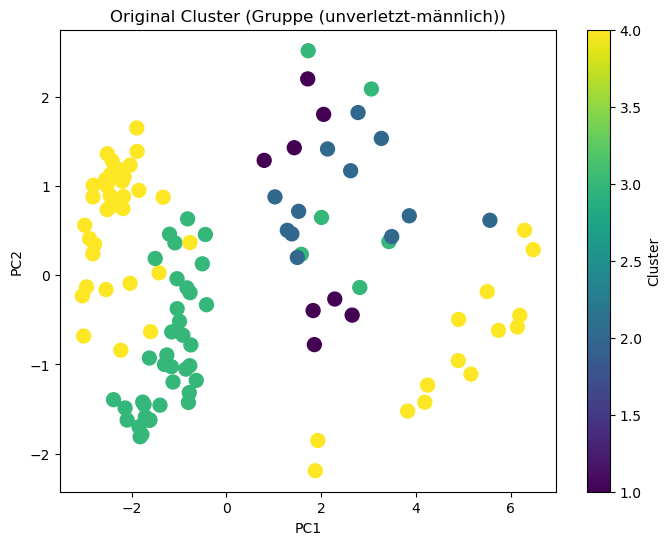

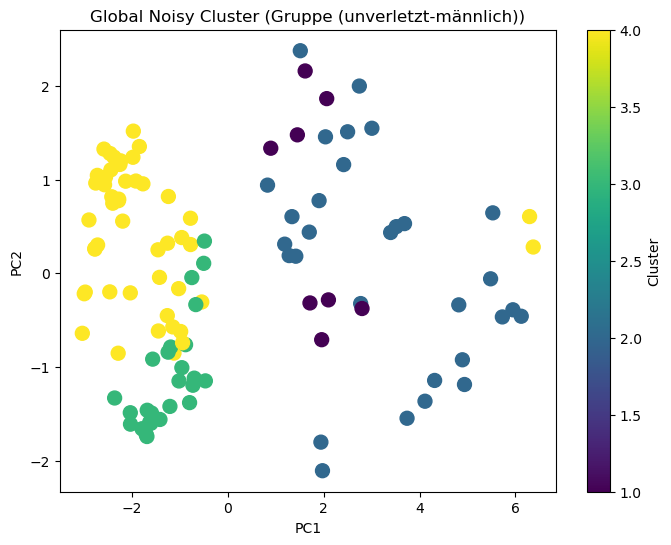

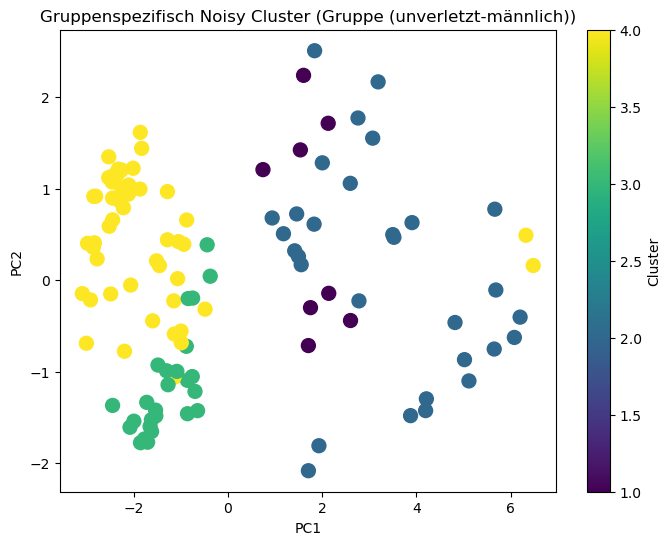

=== Aggregierte Stabilitätsmetriken über 50 Wiederholungen ===

Gruppe (unverletzt-männlich)
  original:             ARI = 1.000 ± 0.000, NMI = 1.000 ± 0.000, Consistency = 100.00% ± 0.00%
  global verrauscht:    ARI = 0.626 ± 0.195, NMI = 0.723 ± 0.145, Consistency = 86.08% ± 9.11%
  gruppenspezifisch:    ARI = 0.580 ± 0.245, NMI = 0.677 ± 0.192, Consistency = 85.40% ± 9.21%

Gruppe (unverletzt-weiblich)
  original:             ARI = 1.000 ± 0.000, NMI = 1.000 ± 0.000, Consistency = 100.00% ± 0.00%
  global verrauscht:    ARI = 0.683 ± 0.124, NMI = 0.711 ± 0.088, Consistency = 86.13% ± 5.32%
  gruppenspezifisch:    ARI = 0.760 ± 0.103, NMI = 0.780 ± 0.080, Consistency = 89.75% ± 4.62%

Gruppe (verletzt-männlich)
  original:             ARI = 1.000 ± 0.000, NMI = 1.000 ± 0.000, Consistency = 100.00% ± 0.00%
  global verrauscht:    ARI = 0.658 ± 0.215, NMI = 0.728 ± 0.137, Consistency = 87.71% ± 6.64%
  gruppenspezifisch:    ARI = 0.702 ± 0.233, NMI = 0.787 ± 0.150, Consistency = 90.68%

In [55]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt
from collections import Counter

# -----------------------------
# 0. Hilfsfunktion: Gruppenschlüssel übersetzen
# -----------------------------
def map_group_label(key):
    """
    Übersetzt den Gruppenschlüssel (Verletzungsstatus, Geschlecht_weiblich) 
    in eine lesbare Bezeichnung.
    
    Verletzungsstatus: 0 -> "unverletzt", 1 -> "verletzt"
    Geschlecht_weiblich: 0 -> "männlich", 1 -> "weiblich"
    """
    status = "verletzt" if key[0] == 1 else "unverletzt"
    gender = "weiblich" if key[1] == 1 else "männlich"
    return f"Gruppe ({status}-{gender})"

# -----------------------------
# 1. Funktion: Rauschen hinzufügen
# -----------------------------
def add_noise_to_data(df, noise_factor=0.1):
    """
    Fügt allen numerischen Spalten (außer "Geschlecht_weiblich" und "Verletzungsstatus")
    Rauschen hinzu, wobei das Rauschen ein Anteil (noise_factor) der ursprünglichen
    Standardabweichung beträgt.
    """
    df_noisy = df.copy()
    numeric_cols = [col for col in df_noisy.select_dtypes(include=['float64', 'int64']).columns 
                    if col not in ["Geschlecht_weiblich", "Verletzungsstatus"]]
    for col in numeric_cols:
        std = df_noisy[col].std()
        noise = np.random.normal(0, std * noise_factor, size=df_noisy.shape[0])
        df_noisy[col] += noise
    return df_noisy

# -----------------------------
# 2. Funktion: Clusterbildung
# -----------------------------
def perform_clustering(X_sub, max_clusters=4):
    """
    Führt eine hierarchische Clusteranalyse auf den numerischen Features (ohne 
    "Geschlecht_weiblich" und "Verletzungsstatus") durch und teilt in max_clusters ein.
    """
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)
    dists = squareform(dist.values)
    Z = linkage(dists, method='ward')
    cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

# -----------------------------
# Hilfsfunktionen für Stabilitätsmetriken und Visualisierung
# -----------------------------
def get_feature_order(df):
    return [col for col in df.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]

def get_cluster_labels(clusters, feature_order):
    feature_cluster = {}
    for cl, feats in clusters.items():
        for feat in feats:
            feature_cluster[feat] = cl
    return [feature_cluster.get(feat, -1) for feat in feature_order]

def visualize_clusters(df_group, clusters, title="Cluster Visualization"):
    """
    Visualisiert die Cluster der Features mittels PCA (auf der Korrelationsmatrix).
    Es werden keine Textannotationen angezeigt, damit die Grafik übersichtlicher bleibt.
    """
    feature_order = get_feature_order(df_group)
    X_num = df_group[feature_order]
    corr = X_num.corr().values
    pca = PCA(n_components=2)
    coords = pca.fit_transform(corr)
    labels = get_cluster_labels(clusters, feature_order)
    
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(coords[:,0], coords[:,1], c=labels, cmap='viridis', s=100)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    plt.colorbar(scatter, label="Cluster")
    plt.show()

# -----------------------------
# 3. Funktionen für Gruppierung und Vergleich
# -----------------------------
def get_group_clusters(df):
    """
    Gruppiert den Datensatz anhand von ("Verletzungsstatus", "Geschlecht_weiblich")
    und berechnet für jede Gruppe die Cluster.
    """
    groups = {}
    for key, group in df.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group = group.reset_index(drop=True)
        clusters = perform_clustering(group, max_clusters=4)
        groups[key] = clusters
    return groups

def compute_stability_metrics(clusters_1, clusters_2, feature_order):
    """
    Vergleicht zwei Clusterlösungen anhand von ARI und NMI.
    """
    labels_1 = get_cluster_labels(clusters_1, feature_order)
    labels_2 = get_cluster_labels(clusters_2, feature_order)
    ari = adjusted_rand_score(labels_1, labels_2)
    nmi = normalized_mutual_info_score(labels_1, labels_2)
    return ari, nmi

def compute_pairwise_metrics(solution_list, feature_order):
    """
    Berechnet pairwise ARI und NMI über eine Liste von Clusterlösungen.
    Gibt (mean_ARI, std_ARI, mean_NMI, std_NMI) zurück.
    """
    aris = []
    nmis = []
    n = len(solution_list)
    for i in range(n):
        for j in range(i+1, n):
            ari, nmi = compute_stability_metrics(solution_list[i], solution_list[j], feature_order)
            aris.append(ari)
            nmis.append(nmi)
    return np.mean(aris), np.std(aris), np.mean(nmis), np.std(nmis)

def compute_pairwise_consistency(solution_list):
    """
    Berechnet pairwise Cluster-Konsistenz (durchschnittlicher Match-Prozentsatz) über eine Liste von Clusterlösungen.
    """
    consistencies = []
    n = len(solution_list)
    for i in range(n):
        for j in range(i+1, n):
            cons = average_cluster_consistency(solution_list[i], solution_list[j])
            consistencies.append(cons)
    return np.mean(consistencies), np.std(consistencies)

def average_cluster_consistency(clusters_1, clusters_2):
    """
    Berechnet für einen Vergleich zweier Clusterlösungen den durchschnittlichen Match-Prozentsatz.
    Für jeden Cluster in clusters_1 wird der beste Matching-Cluster in clusters_2 gesucht.
    """
    match_percentages = []
    for cluster_id, features_1 in clusters_1.items():
        best_match = max(clusters_2.items(), key=lambda x: len(set(features_1).intersection(set(x[1]))))
        match_percentage = len(set(features_1).intersection(set(best_match[1]))) / len(features_1) * 100
        match_percentages.append(match_percentage)
    return np.mean(match_percentages) if match_percentages else np.nan

def get_detailed_cluster_consistency(clusters_1, clusters_2):
    """
    Für jeden Cluster in clusters_1 wird der beste Matching-Cluster in clusters_2 gesucht.
    Gibt ein Dictionary zurück: {orig_cluster: (matched_cluster, match_percentage)}
    """
    details = {}
    for cluster_id, features_1 in clusters_1.items():
        best_match = max(clusters_2.items(), key=lambda x: len(set(features_1).intersection(set(x[1]))))
        match_percentage = len(set(features_1).intersection(set(best_match[1]))) / len(features_1) * 100
        details[cluster_id] = (best_match[0], match_percentage)
    return details

# -----------------------------
# 4. Funktion: Gruppenspezifisches Rauschen hinzufügen
# -----------------------------
def add_noise_to_group(df_group, noise_factor=0.1):
    return add_noise_to_data(df_group, noise_factor=noise_factor)

# -----------------------------
# Simulation: Für eine gegebene Untergruppe
# -----------------------------
def simulate_state_for_group(df_original, key, noise_factor=0.1, n_reps=100, state="global"):
    """
    Simuliert n_reps Clusterlösungen für eine gegebene Subgruppe (key) im Zustand:
      - "global": Es wird global Rauschen zum gesamten Datensatz hinzugefügt.
      - "group": Es wird nur in der Subgruppe Rauschen hinzugefügt.
    Gibt eine Liste von Clusterlösungen zurück.
    """
    solutions = []
    group_orig = df_original[(df_original["Verletzungsstatus"] == key[0]) & (df_original["Geschlecht_weiblich"] == key[1])]
    for _ in range(n_reps):
        if state == "global":
            df_global_noisy = add_noise_to_data(df_original, noise_factor)
            group = df_global_noisy[(df_global_noisy["Verletzungsstatus"] == key[0]) & (df_global_noisy["Geschlecht_weiblich"] == key[1])]
        elif state == "group":
            group = add_noise_to_group(group_orig, noise_factor)
        else:
            raise ValueError("state muss 'global' oder 'group' sein.")
        clusters = perform_clustering(group, max_clusters=4)
        solutions.append(clusters)
    return solutions

# -----------------------------
# 5. Main-Funktion
# -----------------------------
def main():
    # 5.1 Daten laden
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
    df_original = pd.read_excel(file_path)
    print("Original Data Shape:", df_original.shape, "\n")
    
    # Baseline: Original Cluster (deterministisch)
    clusters_original = get_group_clusters(df_original)
    
    # --- ERSTER DURCHLAUF: Ausgabe von Variablenlisten und Visualisierungen ---
    print("==== ERSTER DURCHLAUF: Variablenlisten und Visualisierungen ====\n")
    
    # Global verrauschte Cluster (ein Durchlauf)
    df_global_noisy = add_noise_to_data(df_original, noise_factor=0.1)
    clusters_global_noisy = get_group_clusters(df_global_noisy)
    
    # Gruppenspezifisch verrauschte Cluster (ein Durchlauf)
    clusters_group_specific = {}
    for key, group in df_original.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group = group.reset_index(drop=True)
        group_noisy = add_noise_to_group(group, noise_factor=0.1)
        clusters_group_specific[key] = perform_clustering(group_noisy, max_clusters=4)
    
    # Ausgabe der Clusterzuordnungen (Variablenlisten)
    print("--- Cluster Zuordnungen: Original ---\n")
    for key, clusters in clusters_original.items():
        print(map_group_label(key))
        for cl, cols in clusters.items():
            print("  Cluster", cl, ":", cols)
        print("")
    
    print("--- Cluster Zuordnungen: Global Noisy ---\n")
    for key, clusters in clusters_global_noisy.items():
        print(map_group_label(key))
        for cl, cols in clusters.items():
            print("  Cluster", cl, ":", cols)
        print("")
    
    print("--- Cluster Zuordnungen: Gruppenspezifisch Noisy ---\n")
    for key, clusters in clusters_group_specific.items():
        print(map_group_label(key))
        for cl, cols in clusters.items():
            print("  Cluster", cl, ":", cols)
        print("")
    
    # Visualisierung für eine Beispieluntergruppe
    example_key = list(clusters_original.keys())[0]
    group_orig = df_original[(df_original["Verletzungsstatus"]==example_key[0]) & 
                             (df_original["Geschlecht_weiblich"]==example_key[1])]
    group_global_noisy = df_global_noisy[(df_global_noisy["Verletzungsstatus"]==example_key[0]) & 
                                         (df_global_noisy["Geschlecht_weiblich"]==example_key[1])]
    group_group_noisy = add_noise_to_group(group_orig, noise_factor=0.1)
    clusters_example = perform_clustering(group_group_noisy, max_clusters=4)
    
    visualize_clusters(group_orig, clusters_original[example_key],
                         title=f"Original Cluster ({map_group_label(example_key)})")
    visualize_clusters(group_global_noisy, clusters_global_noisy[example_key],
                         title=f"Global Noisy Cluster ({map_group_label(example_key)})")
    visualize_clusters(group_group_noisy, clusters_example,
                         title=f"Gruppenspezifisch Noisy Cluster ({map_group_label(example_key)})")
    

    n_reps = 100
    sim_results = {}   # Speichert für jede Subgruppe: { 'original': (ARI, NMI, Consistency),
                      #  'global': (mean_ARI, std_ARI, mean_NMI, std_NMI, mean_cons, std_cons),
                      #  'group': (mean_ARI, std_ARI, mean_NMI, std_NMI, mean_cons, std_cons) }
    sim_details = {}   # Für die detaillierte Konsistenz: {key: {comp: {orig_cluster: {'matched': [], 'consistency': []}} } }
    
    for key in clusters_original.keys():
        sim_results[key] = {
            'original': (1.0, 0.0, 1.0, 0.0, 100.0, 0.0),
            'global': None,
            'group': None
        }
        sim_details[key] = {
            'orig_vs_global': {},
            'orig_vs_group': {},
            'global_vs_group': {}
        }
        
        feature_order = get_feature_order(df_original[(df_original["Verletzungsstatus"]==key[0]) & 
                                                      (df_original["Geschlecht_weiblich"]==key[1])])
        
        # Global verrauscht
        global_solutions = simulate_state_for_group(df_original, key, 0.1, n_reps, state="global")
        ari_g, std_ari_g, nmi_g, std_nmi_g = compute_pairwise_metrics(global_solutions, feature_order)
        cons_g, std_cons_g = compute_pairwise_consistency(global_solutions)
        
        # Gruppenspezifisch verrauscht
        group_solutions = simulate_state_for_group(df_original, key, 0.1, n_reps, state="group")
        ari_grp, std_ari_grp, nmi_grp, std_nmi_grp = compute_pairwise_metrics(group_solutions, feature_order)
        cons_grp, std_cons_grp = compute_pairwise_consistency(group_solutions)
        
        sim_results[key]['global'] = (ari_g, std_ari_g, nmi_g, std_nmi_g, cons_g, std_cons_g)
        sim_results[key]['group'] = (ari_grp, std_ari_grp, nmi_grp, std_nmi_grp, cons_grp, std_cons_grp)
        
        # Aggregiere detaillierte Konsistenzdaten
        for comp, sols in zip(['orig_vs_global', 'orig_vs_group'], [global_solutions, group_solutions]):
            details = [get_detailed_cluster_consistency(clusters_original[key], sol) for sol in sols]
            # Nun berechnen wir für jeden Originalcluster die Liste der matched Werte und Consistencies
            for d in details:
                for orig_cluster, (matched, cons) in d.items():
                    if orig_cluster not in sim_details[key][comp]:
                        sim_details[key][comp][orig_cluster] = {'matched': [], 'consistency': []}
                    sim_details[key][comp][orig_cluster]['matched'].append(matched)
                    sim_details[key][comp][orig_cluster]['consistency'].append(cons)
        
        # Für global_vs_group Vergleich
        details = [get_detailed_cluster_consistency(sol1, sol2) for sol1, sol2 in zip(global_solutions, group_solutions)]
        for d in details:
            for orig_cluster, (matched, cons) in d.items():
                if orig_cluster not in sim_details[key]['global_vs_group']:
                    sim_details[key]['global_vs_group'][orig_cluster] = {'matched': [], 'consistency': []}
                sim_details[key]['global_vs_group'][orig_cluster]['matched'].append(matched)
                sim_details[key]['global_vs_group'][orig_cluster]['consistency'].append(cons)
    
    # Aggregierte Ausgabe der stabilitätsmetriken
    print("=== Aggregierte Stabilitätsmetriken über", n_reps, "Wiederholungen ===\n")
    for key, metrics in sim_results.items():
        print(map_group_label(key))
        orig = metrics['original']
        print(f"  original:             ARI = {orig[0]:.3f} ± {orig[1]:.3f}, NMI = {orig[2]:.3f} ± {orig[3]:.3f}, Consistency = {orig[4]:.2f}% ± {orig[5]:.2f}%")
        glob = metrics['global']
        print(f"  global verrauscht:    ARI = {glob[0]:.3f} ± {glob[1]:.3f}, NMI = {glob[2]:.3f} ± {glob[3]:.3f}, Consistency = {glob[4]:.2f}% ± {glob[5]:.2f}%")
        grp = metrics['group']
        print(f"  gruppenspezifisch:    ARI = {grp[0]:.3f} ± {grp[1]:.3f}, NMI = {grp[2]:.3f} ± {grp[3]:.3f}, Consistency = {grp[4]:.2f}% ± {grp[5]:.2f}%")
        print("")
    
    # Aggregierte Ausgabe der detaillierten Cluster-Konsistenz
    print("=== Aggregierte Detaillierte Cluster-Konsistenz (Übereinstimmungsprozente) ===\n")
    for key, comp_dict in sim_details.items():
        print(map_group_label(key))
        for comp, clusters_dict in comp_dict.items():
            print(f"  {comp}:")
            for orig_cluster, values in clusters_dict.items():
                cons_mean = np.mean(values['consistency'])
                cons_std = np.std(values['consistency'])
                mode = Counter(values['matched']).most_common(1)[0][0]
                print(f"    Orig. Cluster {orig_cluster}: {mode} (Übereinstimmung: {cons_mean:.2f}% ± {cons_std:.2f}%)")
            print("")
        print("")
    
if __name__ == '__main__':
    main()


Clusteranzahl validieren:

In [ ]:
def perform_clustering_with_k(X_sub, k):
    """
    Führt eine hierarchische Clusteranalyse auf den numerischen Features durch und teilt in k Cluster ein.
    """
    # Alle Spalten außer "Verletzungsstatus" und "Geschlecht_weiblich"
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    # Korrelation als Basis, dann in Distanzen umwandeln
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)
    dists = squareform(dist.values)
    # Hierarchische Clusterbildung mit Ward-Methode
    Z = linkage(dists, method='ward')
    # Cluster-Zuweisung für k Cluster
    cluster_labels = fcluster(Z, k, criterion='maxclust')
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

def simulate_state_for_group_with_k(df_original, key, noise_factor=0.1, n_reps=100, state="global", k=4):
    """
    Wie simulate_state_for_group, aber mit variabler Clusterzahl k.
    Führt n_reps Simulationen für eine bestimmte Untergruppe (definiert durch key) durch.
    """
    solutions = []
    group_orig = df_original[(df_original["Verletzungsstatus"] == key[0]) &
                              (df_original["Geschlecht_weiblich"] == key[1])]
    for _ in range(n_reps):
        if state == "global":
            df_global_noisy = add_noise_to_data(df_original, noise_factor)
            group = df_global_noisy[(df_global_noisy["Verletzungsstatus"] == key[0]) &
                                    (df_global_noisy["Geschlecht_weiblich"] == key[1])]
        elif state == "group":
            group = add_noise_to_group(group_orig, noise_factor)
        else:
            raise ValueError("state muss 'global' oder 'group' sein.")
        clusters = perform_clustering_with_k(group, k)
        solutions.append(clusters)
    return solutions

# Beispiel: Vergleich verschiedener Clusterzahlen (z. B. 4 bis 12) für eine bestimmte Untergruppe
# Angenommen, df_original ist bereits geladen und key sowie feature_order wurden wie folgt definiert:
# key = (Verletzungsstatus, Geschlecht_weiblich) einer bestimmten Untergruppe, z.B. (0, 0)
# feature_order = get_feature_order(df_original[(df_original["Verletzungsstatus"]==key[0]) & 
#                                                (df_original["Geschlecht_weiblich"]==key[1])])

key = (0, 0)  # Beispiel: Gruppe "unverletzt-männlich"
feature_order = get_feature_order(df_original[(df_original["Verletzungsstatus"] == key[0]) &
                                                (df_original["Geschlecht_weiblich"] == key[1])])

candidate_ks = range(4, 13)  # Clusterzahlen von 4 bis 12
stability_results = {}

print("Evaluierung der Stabilität für verschiedene Clusterzahlen:")
for k in candidate_ks:
    # Hier wird die Simulation für den Zustand 'global verrauscht' durchgeführt
    solutions = simulate_state_for_group_with_k(df_original, key, noise_factor=0.1, n_reps=100, state="global", k=k)
    ari_mean, ari_std, nmi_mean, nmi_std = compute_pairwise_metrics(solutions, feature_order)
    cons_mean, cons_std = compute_pairwise_consistency(solutions)
    stability_results[k] = {
        "ARI": (ari_mean, ari_std),
        "NMI": (nmi_mean, nmi_std),
        "Consistency": (cons_mean, cons_std)
    }
    print(f"Clusterzahl {k}: ARI = {ari_mean:.3f} ± {ari_std:.3f}, "
          f"NMI = {nmi_mean:.3f} ± {nmi_std:.3f}, "
          f"Consistency = {cons_mean:.2f}% ± {cons_std:.2f}%")


In [ ]:
Clusteranzahl: GridSearch (manuell) und Optuna-Optimization für jede Untergruppe

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score, silhouette_score
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
from collections import Counter
import matplotlib.pyplot as plt

# -----------------------------
# 0. Hilfsfunktion: Gruppenschlüssel übersetzen
# -----------------------------
def map_group_label(key):
    """
    Übersetzt den Gruppenschlüssel (Verletzungsstatus, Geschlecht_weiblich) 
    in eine lesbare Bezeichnung.
    
    Verletzungsstatus: 0 -> "unverletzt", 1 -> "verletzt"
    Geschlecht_weiblich: 0 -> "männlich", 1 -> "weiblich"
    """
    status = "verletzt" if key[0] == 1 else "unverletzt"
    gender = "weiblich" if key[1] == 1 else "männlich"
    return f"Gruppe ({status}-{gender})"

# -----------------------------
# 1. Funktion: Clusterbildung mit variabler Clusterzahl
# -----------------------------
def perform_clustering_with_k(X_sub, k):
    """
    Führt eine hierarchische Clusteranalyse auf den numerischen Features durch 
    (ohne "Verletzungsstatus" und "Geschlecht_weiblich") und teilt in k Cluster ein.
    """
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)
    dists = squareform(dist.values)
    Z = linkage(dists, method='ward')
    cluster_labels = fcluster(Z, k, criterion='maxclust')
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

# -----------------------------
# 2. Hilfsfunktionen: Feature-Reihenfolge und Clusterlabels
# -----------------------------
def get_feature_order(df):
    """Gibt die Reihenfolge der numerischen Features zurück (ohne die Gruppierungsvariablen)."""
    return [col for col in df.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]

def get_cluster_labels(clusters, feature_order):
    """
    Ordnet den Features in feature_order ihre Clusterzuweisung zu.
    Gibt eine Liste von Labels zurück.
    """
    feature_cluster = {}
    for cl, feats in clusters.items():
        for feat in feats:
            feature_cluster[feat] = cl
    return [feature_cluster.get(feat, -1) for feat in feature_order]

# -----------------------------
# 3. Bootstrapping-Evaluation für eine gegebene Clusterzahl k
# -----------------------------
def bootstrap_cluster_evaluation(df_group, k, n_reps=100):
    """
    Führt n_reps Bootstrap-Samples (Sampling mit Zurücklegen) der Gruppe durch.
    Für jedes Sample wird das Clustering mit k Clustern durchgeführt und:
      - Der Silhouettenkoeffizient (auf Basis der Distanzmatrix aus der Korrelationsmatrix)
      - Die Clusterzuweisungen gespeichert.
    Anschließend wird der Durchschnitt der Silhouettenwerte und
    der durchschnittliche pairwise Adjusted Rand Index (ARI) als Stabilitätsmaß berechnet.
    """
    feature_order = get_feature_order(df_group)
    silhouette_scores = []
    labels_list = []
    
    for _ in range(n_reps):
        # Bootstrap-Sample (gleiche Anzahl Zeilen, mit Zurücklegen)
        sample_df = df_group.sample(frac=1.0, replace=True)
        clusters = perform_clustering_with_k(sample_df, k)
        labels = get_cluster_labels(clusters, feature_order)
        
        # Distanzmatrix aus der Bootstrap-Stichprobe (auf Basis der Features)
        X = sample_df[feature_order]
        corr = X.corr().abs()
        dist = np.clip(1 - corr, a_min=0, a_max=None)
        
        # Silhouettenwert nur berechnen, wenn mehr als ein Cluster vorhanden ist
        if len(set(labels)) > 1:
            try:
                score = silhouette_score(dist, labels, metric="precomputed")
                silhouette_scores.append(score)
                labels_list.append(labels)
            except Exception as e:
                # Falls es zu Fehlern kommt (z.B. unzureichende Varianz)
                continue

    # Berechne durchschnittliche pairwise ARI zwischen allen Iterationen
    aris = []
    n = len(labels_list)
    for i in range(n):
        for j in range(i+1, n):
            ari = adjusted_rand_score(labels_list[i], labels_list[j])
            aris.append(ari)
    
    avg_sil = np.mean(silhouette_scores) if silhouette_scores else np.nan
    avg_ari = np.mean(aris) if aris else np.nan
    return avg_sil, avg_ari

# -----------------------------
# 4. Manueller Grid Search Ansatz: Evaluation für verschiedene k
# -----------------------------
def evaluate_subgroup_manual(df_group, candidate_ks=range(10, 21), n_reps=100):
    """
    Führt für jede Kandidaten-Clusterzahl im Bereich candidate_ks n_reps Bootstrap-Iterationen 
    durch und berechnet den durchschnittlichen Silhouettenkoeffizienten sowie den 
    durchschnittlichen pairwise ARI. Es wird ein kombiniertes Gütemaß (Mittelwert beider) berechnet.
    Gibt eine Dictionary-Struktur mit den Ergebnissen pro k zurück.
    """
    results = {}
    for k in candidate_ks:
        avg_sil, avg_ari = bootstrap_cluster_evaluation(df_group, k, n_reps=n_reps)
        combined = 0.5 * avg_sil + 0.5 * avg_ari  # Gewichtung beider Metriken (könnte angepasst werden)
        results[k] = {"silhouette": avg_sil, "ari": avg_ari, "combined": combined}
    best_k = max(results, key=lambda x: results[x]["combined"])
    return best_k, results

# -----------------------------
# 5. Optuna-Optimierung: Zielfunktion und Optimierungsroutine
# -----------------------------
def objective(trial, df_group, n_reps=100):
    """
    Optuna-Zielfunktion, die für einen gegebenen k (zwischen 4 und 15) 
    den kombinierten Score (Mittelwert aus Silhouettenkoeffizient und ARI) zurückgibt.
    """
    k = trial.suggest_int("k", 10, 20)
    avg_sil, avg_ari = bootstrap_cluster_evaluation(df_group, k, n_reps=n_reps)
    # Kombiniere die beiden Metriken (hier gleich gewichtet)
    return 0.5 * avg_sil + 0.5 * avg_ari

def evaluate_subgroup_optuna(df_group, n_reps=100, n_trials=100):
    """
    Führt eine Optuna-Optimierung durch, um den optimalen k-Wert zu finden.
    n_reps bestimmt die Anzahl der Bootstrap-Iterationen pro Trial,
    und n_trials legt die Anzahl der Optimierungsdurchläufe fest.
    """
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, df_group, n_reps=n_reps), n_trials=n_trials)
    best_k = study.best_params["k"]
    best_value = study.best_value
    return best_k, best_value, study

# -----------------------------
# 6. Gesamtauswertung für eine Untergruppe (beide Ansätze)
# -----------------------------
def evaluate_subgroup(df_group, label):
    print(f"Subgruppe: {label}")
    print("----- Manueller Grid Search Ansatz -----")
    best_k_manual, results = evaluate_subgroup_manual(df_group, candidate_ks=range(10, 21), n_reps=100)
    print("k\tSilhouette\tARI\t\tCombined")
    for k in sorted(results.keys()):
        metrics = results[k]
        print(f"{k}\t{metrics['silhouette']:.3f}\t\t{metrics['ari']:.3f}\t\t{metrics['combined']:.3f}")
    print(f"-> Beste Clusterzahl (manuell): {best_k_manual}")
    
    print("\n----- Optuna-Optimierung -----")
    best_k_optuna, best_value, study = evaluate_subgroup_optuna(df_group, n_reps=100, n_trials=100)
    print(f"-> Beste Clusterzahl (Optuna): {best_k_optuna} mit Zielfunktionswert {best_value:.3f}")
    print("="*50, "\n")

# -----------------------------
# 7. Main-Funktion: Aufteilen der Daten und Auswertung pro Untergruppe
# -----------------------------
def main():
    # Daten laden (Passe den Pfad an)
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
    df_original = pd.read_excel(file_path)
    
    # Aufteilen in 4 Untergruppen: nach Verletzungsstatus und Geschlecht_weiblich
    groups = df_original.groupby(["Verletzungsstatus", "Geschlecht_weiblich"])
    for key, group in groups:
        group = group.reset_index(drop=True)
        subgroup_label = map_group_label(key)
        evaluate_subgroup(group, subgroup_label)

if __name__ == '__main__':
    main()


Original Data Shape: (113, 114) 

Subgruppe: Gruppe (unverletzt-männlich)
----- Manueller Grid Search Ansatz -----
k	Silhouette	ARI		Combined
10	0.326		0.449		0.387
11	0.336		0.455		0.395
12	0.353		0.497		0.425
13	0.359		0.515		0.437
14	0.369		0.542		0.455
15	0.377		0.529		0.453
16	0.389		0.569		0.479
17	0.401		0.585		0.493
18	0.406		0.569		0.487
19	0.414		0.602		0.508
20	0.422		0.623		0.523
-> Beste Clusterzahl (manuell): 20

----- Optuna-Optimierung -----
-> Beste Clusterzahl (Optuna): 20 mit Zielfunktionswert 0.524

Subgruppe: Gruppe (unverletzt-weiblich)
----- Manueller Grid Search Ansatz -----
k	Silhouette	ARI		Combined
10	0.335		0.310		0.322
11	0.347		0.293		0.320
12	0.352		0.298		0.325
13	0.353		0.294		0.324
14	0.362		0.305		0.334
15	0.371		0.315		0.343
16	0.369		0.323		0.346
17	0.383		0.318		0.350
18	0.383		0.339		0.361
19	0.390		0.353		0.371
20	0.400		0.344		0.372
-> Beste Clusterzahl (manuell): 20

----- Optuna-Optimierung -----
-> Beste Clusterzahl (Optuna): 20 mit Zielfunkt

Datenaugmentation mit Frankenstein Methode mit innerer CV validiert gegenüber innerer CV ohne Datenaugmentation

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# -----------------------------
# Datenaugmentierung: Funktionen
# -----------------------------
def load_dataset(filepath):
    """
    Lädt den Datensatz und bereitet ihn für die Analyse vor.
    """
    df = pd.read_excel(filepath)
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_features = [col for col in numeric_features if col not in ['Geschlecht_weiblich', 'Verletzungsstatus']]
    X = df[numeric_features + ['Geschlecht_weiblich']]
    y = df['Verletzungsstatus']
    return X, y

def augment_data_by_group_means(X_train, y_train, augmentation_factor=4):
    """
    Augmentiert Daten basierend auf Gruppenmittelwerten.
    Die Augmentation erfolgt **innerhalb** der Gruppen, die durch 'Verletzungsstatus'
    und 'Geschlecht_weiblich' definiert sind.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    
    # Gruppierung nach Verletzungsstatus und Geschlecht
    groups = df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"])
    
    total_original_samples = len(df_train)
    total_new_samples = int(total_original_samples * (augmentation_factor - 1))
    
    augmented_groups = []
    group_sizes = groups.size()
    group_proportions = group_sizes / total_original_samples
    
    for (injury_status, is_female), group_df in groups:
        group_df = group_df.reset_index(drop=True)
        group_new_samples = int(total_new_samples * group_proportions[(injury_status, is_female)])
        new_group_samples = []
        
        for _ in range(group_new_samples):
            sample_indices = np.random.choice(len(group_df), 2, replace=False)
            sample1 = group_df.iloc[sample_indices[0]]
            sample2 = group_df.iloc[sample_indices[1]]
            
            mean_sample = sample1.copy()
            numeric_cols = [col for col in X_train.columns if col != "Geschlecht_weiblich"]
            for col in numeric_cols:
                mean_sample[col] = (sample1[col] + sample2[col]) / 2
            
            new_group_samples.append(mean_sample)
        
        if new_group_samples:
            new_group_df = pd.DataFrame(new_group_samples)
            augmented_groups.append(new_group_df)
    
    augmented_df = pd.concat([df_train] + augmented_groups, ignore_index=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    
    return X_aug, y_aug

# -----------------------------
# Innere Cross-Validation mit Augmentierung
# -----------------------------
def inner_cv_with_new_augmentation(X_train, y_train):
    """
    Führt eine innere Cross-Validation durch, bei der die Datenaugmentation
    **nur auf die Trainingsdaten** eines Folds angewandt wird.
    Gibt den durchschnittlichen ROC AUC Score zurück.
    """
    inner_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = []
    
    for train_idx, test_idx in inner_cv.split(X_train, y_train):
        # Aufteilen der Daten im Fold
        X_inner_train = X_train.iloc[train_idx].copy()
        X_inner_test = X_train.iloc[test_idx].copy()
        y_inner_train = y_train.iloc[train_idx]
        y_inner_test = y_train.iloc[test_idx]
        
        # Normalisierung: 'Geschlecht_weiblich' bleibt unberührt
        dummy = "Geschlecht_weiblich"
        cols_to_scale = [col for col in X_inner_train.columns if col != dummy]
        scaler = StandardScaler()
        X_inner_train[cols_to_scale] = scaler.fit_transform(X_inner_train[cols_to_scale])
        X_inner_test[cols_to_scale] = scaler.transform(X_inner_test[cols_to_scale])
        
        # Augmentation **nur auf den Trainingsdaten**
        X_inner_train_aug, y_inner_train_aug = augment_data_by_group_means(
            X_inner_train, y_inner_train, augmentation_factor=2
        )
        
        # Modelltraining und Evaluierung innerhalb des Folds
        model = LogisticRegression(max_iter=1000)
        score = cross_val_score(model, X_inner_train_aug, y_inner_train_aug, 
                                cv=3, scoring="roc_auc", n_jobs=-1).mean()
        scores.append(score)
    
    avg_score = np.mean(scores)
    return avg_score

# -----------------------------
# Innere Cross-Validation ohne Augmentation
# -----------------------------
def inner_cv_without_augmentation(X_train, y_train):
    """
    Führt eine innere Cross-Validation durch **ohne** Datenaugmentation.
    Die Normalisierung erfolgt wie bei der Augmentierung, danach wird das Modell
    auf den Original-Trainingsdaten trainiert und validiert.
    
    Gibt den durchschnittlichen ROC AUC Score zurück.
    """
    inner_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    scores = []
    
    for train_idx, test_idx in inner_cv.split(X_train, y_train):
        # Aufteilen der Daten im Fold
        X_inner_train = X_train.iloc[train_idx].copy()
        X_inner_test = X_train.iloc[test_idx].copy()
        y_inner_train = y_train.iloc[train_idx]
        y_inner_test = y_train.iloc[test_idx]
        
        # Normalisierung: 'Geschlecht_weiblich' bleibt unberührt
        dummy = "Geschlecht_weiblich"
        cols_to_scale = [col for col in X_inner_train.columns if col != dummy]
        scaler = StandardScaler()
        X_inner_train[cols_to_scale] = scaler.fit_transform(X_inner_train[cols_to_scale])
        X_inner_test[cols_to_scale] = scaler.transform(X_inner_test[cols_to_scale])
        
        # Kein Augmentierungsschritt, Modelltraining direkt mit Originaldaten
        model = LogisticRegression(max_iter=1000)
        score = cross_val_score(model, X_inner_train, y_inner_train, 
                                cv=3, scoring="roc_auc", n_jobs=-1).mean()
        scores.append(score)
    
    avg_score = np.mean(scores)
    return avg_score

# -----------------------------
# Test-Ablauf
# -----------------------------
if __name__ == '__main__':
    # Datensatz laden
    filepath = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
    X, y = load_dataset(filepath)
    
    # Innere CV mit Augmentierung
    avg_auc_aug = inner_cv_with_new_augmentation(X, y)
    print(f"Durchschnittlicher ROC-AUC Score (mit Augmentation): {avg_auc_aug:.3f}")
    
    # Innere CV ohne Augmentierung
    avg_auc_orig = inner_cv_without_augmentation(X, y)
    print(f"Durchschnittlicher ROC-AUC Score (ohne Augmentation): {avg_auc_orig:.3f}")

   # Differenz der beiden Scores berechnen und ausgeben
    diff = avg_auc_aug - avg_auc_orig
    print(f"Differenz (mit - ohne Augmentierung): {diff:.3f}")

Durchschnittlicher ROC-AUC Score (mit Augmentation): 0.989
Durchschnittlicher ROC-AUC Score (ohne Augmentation): 0.926
Differenz (mit - ohne Augmentierung): 0.062


Testen der Frankenstein-Methode

Originaler Datensatz:
Anzahl Samples: 113
Gruppenverteilung:
Verletzungsstatus  Geschlecht_weiblich
0                  0                      36
                   1                      16
1                  0                      36
                   1                      25
dtype: int64

Augmentierter Datensatz:
Anzahl Samples: 226
Verletzungsstatus  Geschlecht_weiblich
0.0                0.0                    72
                   1.0                    32
1.0                0.0                    72
                   1.0                    50
dtype: int64

Mittelwerte der numerischen Features:

Originale Daten:
       CMJ_Jump Height flighttime  CMJ_Net Impulse  CMJ_Vertical Takeoff velocity  CMJ_Jump Height impulse  \
count                  113.000000       113.000000                     113.000000               113.000000   
mean                    33.620673         2.490705                       0.036044                 0.461958   
std                      7.980684         

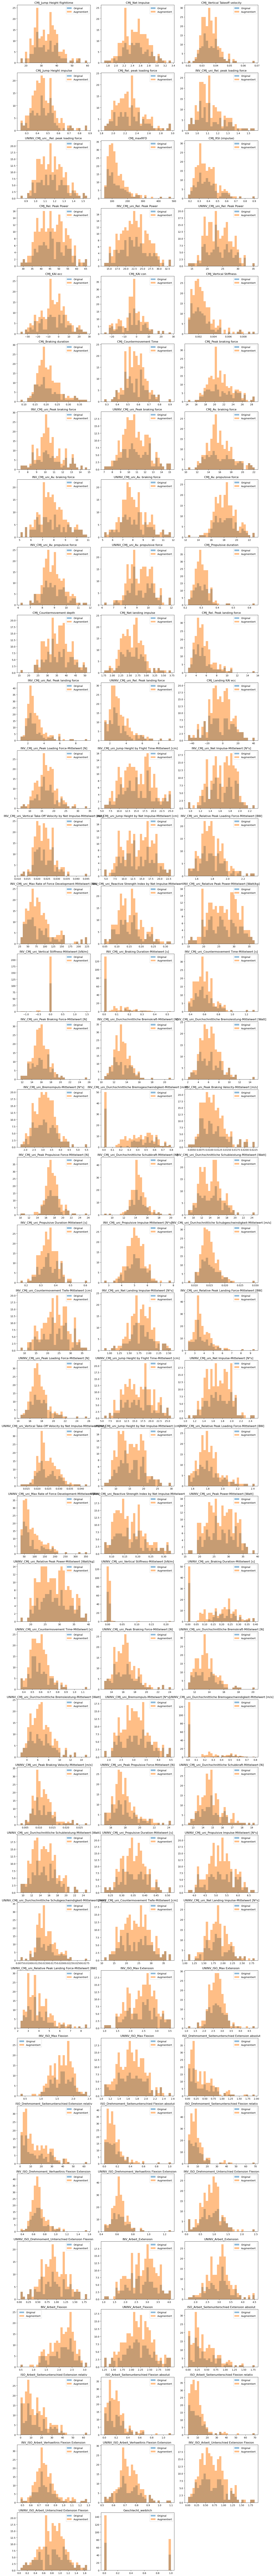

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(filepath):
    """
    Lädt den Datensatz und bereitet ihn für die Analyse vor
    """
    # Datei laden
    df = pd.read_excel(filepath)
    
    # Numerische Features auswählen
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Entferne 'Geschlecht_weiblich' und 'Verletzungsstatus' aus den numerischen Features, falls vorhanden
    numeric_features = [col for col in numeric_features if col not in ['Geschlecht_weiblich', 'Verletzungsstatus']]
    
    # Features für die Augmentation vorbereiten
    X = df[numeric_features + ['Geschlecht_weiblich']]
    y = df['Verletzungsstatus']
    
    return X, y

def augment_data_by_group_means(X_train, y_train, augmentation_factor=4):
    """
    Augmentiert Daten basierend auf Gruppenmittelwerten
    """
    # Kombiniere Features und Zielvaribale
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    
    # Identifiziere Gruppen
    groups = df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"])
    
    # Berechne Gesamtzahl der zu generierenden Samples
    total_original_samples = len(df_train)
    total_new_samples = int(total_original_samples * (augmentation_factor - 1))
    
    # Tracking für augmentierte Daten
    augmented_groups = []
    
    # Berechne Gruppengrößen und -proportionen
    group_sizes = groups.size()
    group_proportions = group_sizes / total_original_samples
    
    for (injury_status, is_female), group_df in groups:
        # Reset Index für einfaches Sampling
        group_df = group_df.reset_index(drop=True)
        
        # Berechne neue Samples für diese Gruppe
        group_new_samples = int(total_new_samples * group_proportions[(injury_status, is_female)])
        
        # Temporäre Liste für neue Samples dieser Gruppe
        new_group_samples = []
        
        for _ in range(group_new_samples):
            # Zufällige Auswahl von zwei originalen Samples
            sample_indices = np.random.choice(len(group_df), 2, replace=False)
            sample1 = group_df.iloc[sample_indices[0]]
            sample2 = group_df.iloc[sample_indices[1]]
            
            # Neues Sample durch Mittelwertbildung
            mean_sample = sample1.copy()
            numeric_cols = [col for col in X_train.columns if col != "Geschlecht_weiblich"]
            
            for col in numeric_cols:
                mean_sample[col] = (sample1[col] + sample2[col]) / 2
            
            new_group_samples.append(mean_sample)
        
        # Konvertiere neue Samples zu DataFrame
        if new_group_samples:
            new_group_df = pd.DataFrame(new_group_samples)
            augmented_groups.append(new_group_df)
    
    # Kombiniere originale und augmentierte Daten
    augmented_df = pd.concat([df_train] + augmented_groups, ignore_index=True)
    
    # Trenne Features und Zielvaribale
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    
    return X_aug, y_aug

def test_augmentation(filepath):
    # Datensatz laden
    X_train, y_train = load_dataset(filepath)
    
    # Augmentation durchführen
    X_aug, y_aug = augment_data_by_group_means(X_train, y_train, augmentation_factor=2)
    
    # Ausgabe der Ergebnisse
    print("Originaler Datensatz:")
    print("Anzahl Samples:", len(X_train))
    print("Gruppenverteilung:")
    original_groups = X_train.copy()
    original_groups['Verletzungsstatus'] = y_train
    print(original_groups.groupby(['Verletzungsstatus', 'Geschlecht_weiblich']).size())
    
    print("\nAugmentierter Datensatz:")
    print("Anzahl Samples:", len(X_aug))
    augmented_groups = X_aug.copy()
    augmented_groups['Verletzungsstatus'] = y_aug
    print(augmented_groups.groupby(['Verletzungsstatus', 'Geschlecht_weiblich']).size())
    
    # Überprüfen der Mittelwerte
    print("\nMittelwerte der numerischen Features:")
    print("\nOriginale Daten:")
    print(X_train.describe())
    
    print("\nAugmentierte Daten:")
    print(X_aug.describe())
    
    # Zusätzliche Visualisierung
    # Wähle alle numerischen Features
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Berechne Anzahl der Spalten und Reihen für Subplots
    n_features = len(numeric_features)
    n_cols = 3  # Maximal 3 Spalten
    n_rows = (n_features + n_cols - 1) // n_cols  # Aufrunden
    
    # Erstelle eine große Figure mit angepasster Höhe
    plt.figure(figsize=(5*n_cols, 4*n_rows))
    
    for i, feature in enumerate(numeric_features, 1):
        plt.subplot(n_rows, n_cols, i)
        plt.hist(X_train[feature], alpha=0.5, label='Original', bins=30)
        plt.hist(X_aug[feature], alpha=0.5, label='Augmentiert', bins=30)
        plt.title(feature)
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Pfad zur Datei
filepath = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"

# Test ausführen
test_augmentation(filepath)

In [ ]:
Verbesserte Version mit Fortschrittsbalken, Verteilungsplots und besserem Umgang mit Geschlecht_weiblich-Spalte

Loading dataset from K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx...
Dataset loaded. Shape: (113, 114)
Gender column 'Geschlecht_weiblich' found in dataset.

Data Overview:
Total samples: 113
Features: 113
Target distribution:
Verletzungsstatus
1    61
0    52
Name: count, dtype: int64

Visualizing original data distributions...


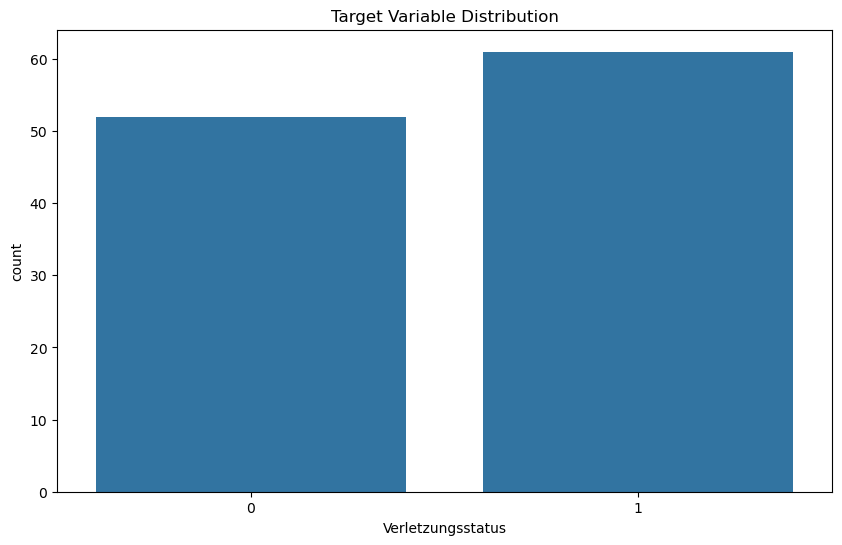

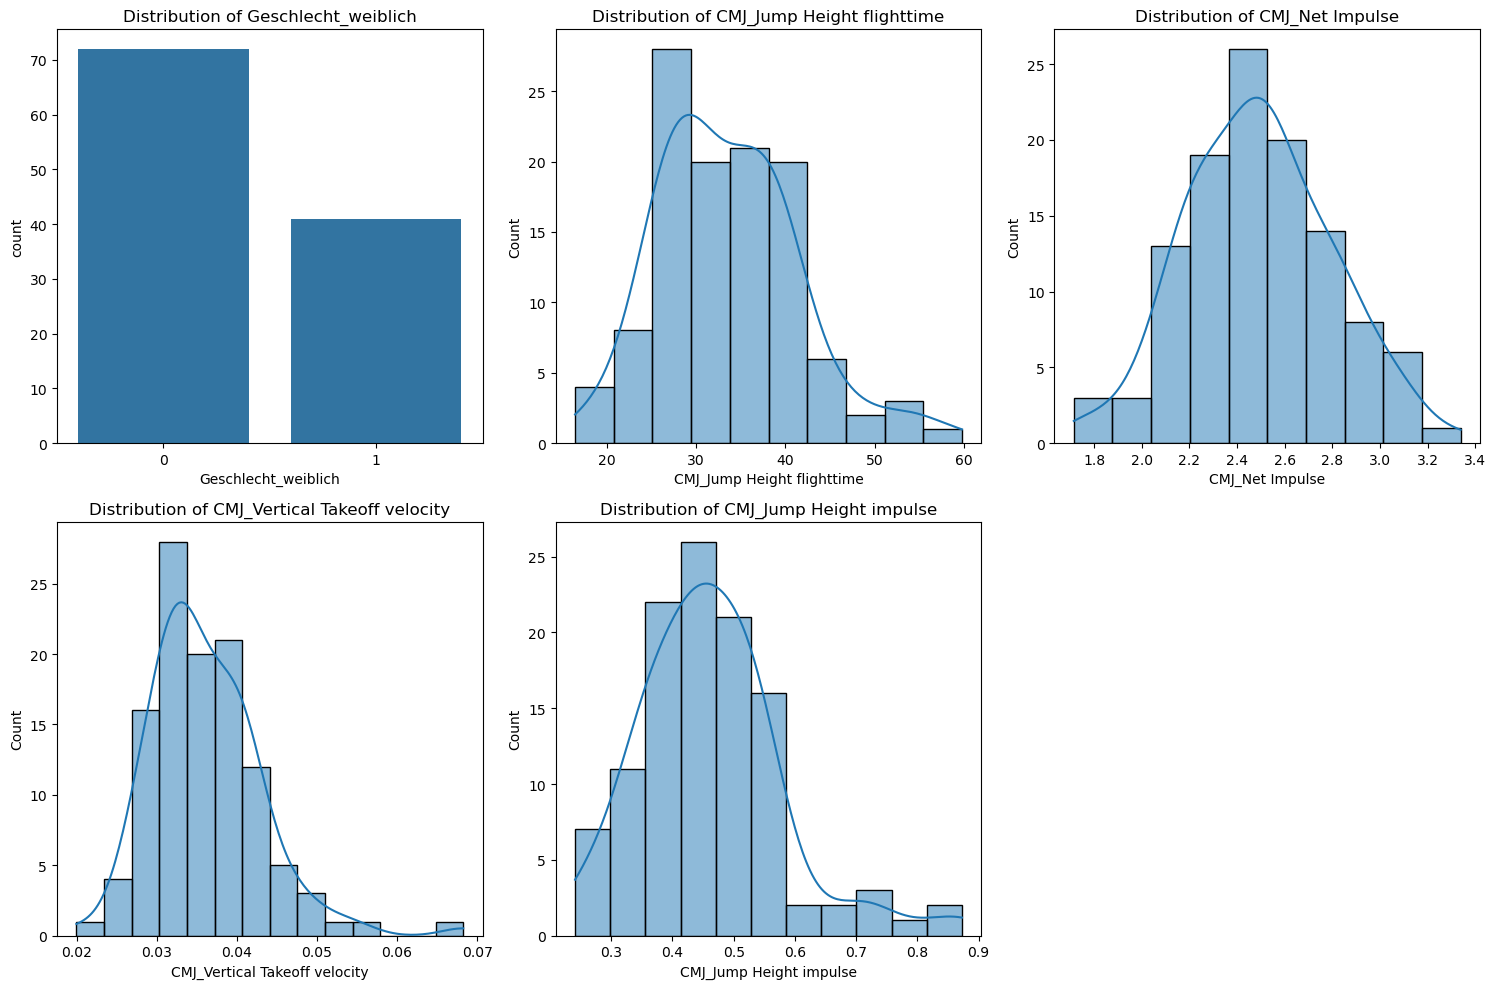


Defining models...


Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]


Validating model: Logistic Regression


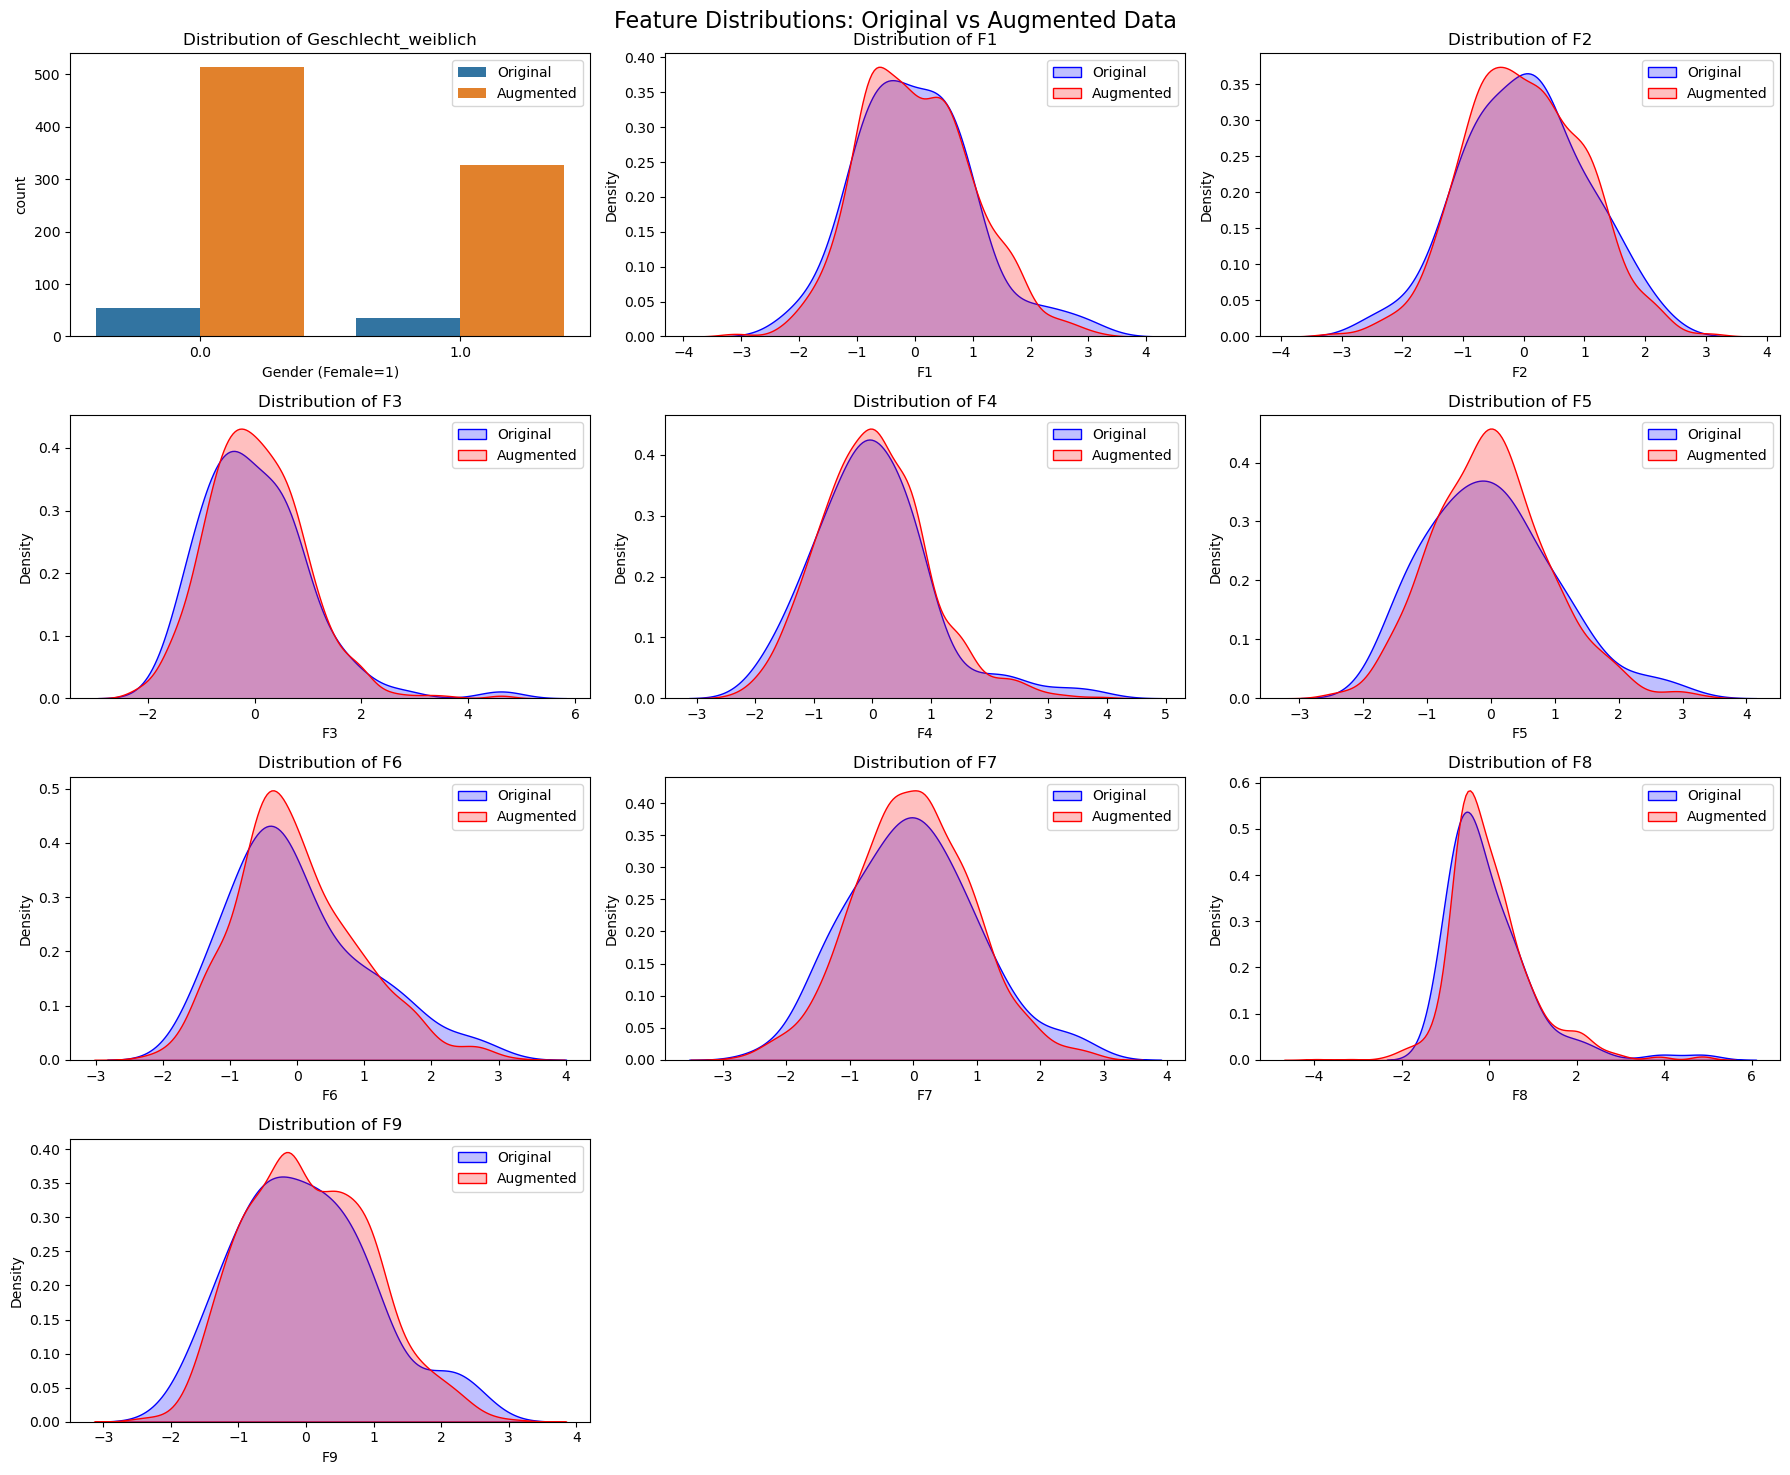

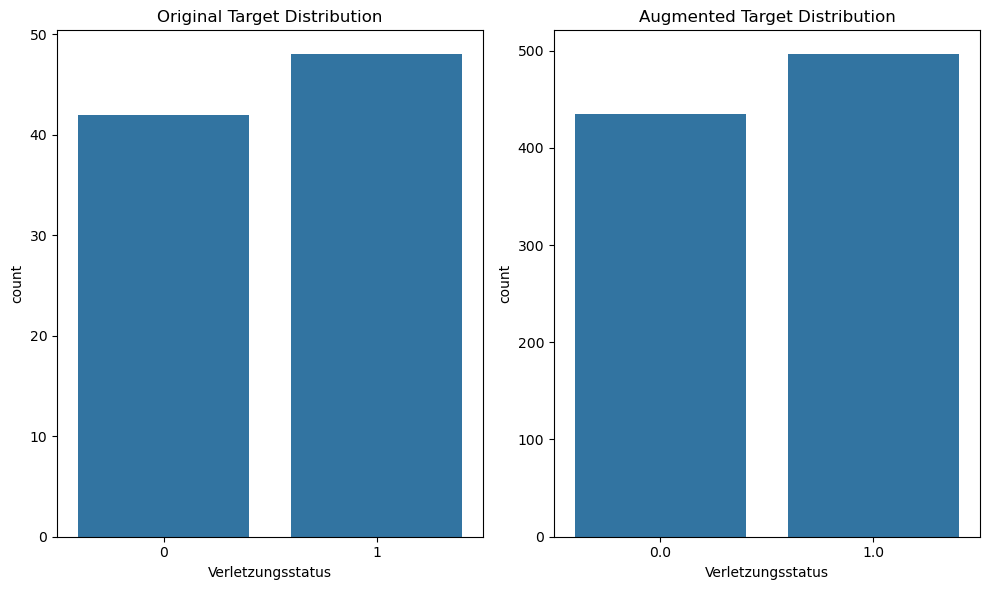

Overall Progress:   7%|▋         | 50/700 [01:19<17:17,  1.60s/it]


Validating model: Decision Tree


Overall Progress:  14%|█▍        | 100/700 [02:40<16:19,  1.63s/it]


Validating model: Random Forest


Overall Progress:  21%|██▏       | 150/700 [04:18<18:08,  1.98s/it]


Validating model: Gradient Boosting


Overall Progress:  29%|██▊       | 200/700 [07:50<34:03,  4.09s/it]


Validating model: XGBoost


Overall Progress:  29%|██▉       | 202/700 [07:54<23:53,  2.88s/it]

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import time
import warnings
from tqdm import tqdm

pd.set_option("display.width", 200)
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output


#############################################
# HELPER FUNCTIONS FOR VISUALIZATION
#############################################

def plot_distribution_comparison(X_original, X_augmented, cols_to_plot=None, n_cols=3, figsize=(18, 15)):
    """
    Plot distribution comparison between original and augmented data.

    Parameters:
    -----------
    X_original : DataFrame
        Original feature dataframe
    X_augmented : DataFrame
        Augmented feature dataframe
    cols_to_plot : list, optional
        List of columns to plot. If None, all columns will be plotted.
    n_cols : int, optional
        Number of columns in the subplot grid
    figsize : tuple, optional
        Figure size
    """
    if cols_to_plot is None:
        cols_to_plot = X_original.columns

    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        ax = axes[i]
        if col == "Geschlecht_weiblich":
            # For categorical features like gender, use countplot
            counts_orig = X_original[col].value_counts().reset_index()
            counts_orig.columns = [col, 'count']
            counts_orig['Source'] = 'Original'

            counts_aug = X_augmented[col].value_counts().reset_index()
            counts_aug.columns = [col, 'count']
            counts_aug['Source'] = 'Augmented'

            counts = pd.concat([counts_orig, counts_aug], ignore_index=True)

            sns.barplot(x=col, y='count', hue='Source', data=counts, ax=ax)
            ax.set_xlabel('Gender (Female=1)')
        else:
            # For continuous features, use KDE plots
            if X_original[col].nunique() > 1:  # Nur plotten, wenn mehr als 1 Wert vorhanden
                sns.kdeplot(X_original[col], label='Original', ax=ax, color='blue', fill=True)
            if X_augmented[col].nunique() > 1:  # Nur plotten, wenn mehr als 1 Wert vorhanden
                sns.kdeplot(X_augmented[col], label='Augmented', ax=ax, color='red', fill=True)

        ax.set_title(f'Distribution of {col}')
        ax.legend()

    # Hide empty subplots
    for i in range(len(cols_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    return fig


#############################################
# AUGMENTATIONSMETHODEN
#############################################

### 1. Cluster-basierte Augmentation (ohne zusätzliches Rauschen)
def perform_clustering(X_sub, max_clusters=4):
    # Wähle alle numerischen Spalten außer den Gruppierungsvariablen
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    # Berechne die (absoluten) Korrelationen und transformiere in Distanzen
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)
    dists = squareform(dist.values)
    Z = linkage(dists, method='ward')
    cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

def augment_subgroup(X_sub, clusters, p_augment=0.7):
    # Für jede Cluster-Gruppe: berechne Mittelwert und Kovarianzmatrix
    augmented_rows = []
    cluster_params = {}
    for cl_id, cols in clusters.items():
        cluster_data = X_sub[cols]
        mu = cluster_data.mean().values
        if len(cols) == 1:
            cov = np.cov(cluster_data.values.flatten(), ddof=0)
            cov = np.atleast_2d(cov)
        else:
            cov = np.cov(cluster_data.values, rowvar=False)
        cluster_params[cl_id] = (mu, cov, cols)
    # Für jede Zeile werden für jede Cluster-Gruppe (stochastisch) neue Werte gezogen
    for idx, row in X_sub.iterrows():
        new_row = row.copy()
        for cl_id, (mu, cov, cols) in cluster_params.items():
            if np.random.rand() < p_augment:
                new_values = np.random.multivariate_normal(mu, cov)
                for col, val in zip(cols, new_values):
                    new_row[col] = val
        augmented_rows.append(new_row)
    augmented_df = pd.DataFrame(augmented_rows)
    for col in ["Geschlecht_weiblich", "Verletzungsstatus"]:
        if col in augmented_df.columns:
            augmented_df[col] = augmented_df[col].astype(int)
    return augmented_df

def augment_training_data_cluster(X_train, y_train, num_new_samples=1, max_clusters=4, p_augment=0.7):
    """
    Augmentiert die Trainingsdaten nach dem Cluster-Ansatz.
    num_new_samples gibt an, wie viele augmentierte Samples pro Originalzeile generiert werden.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    augmented_groups = []
    
    # Stratifikation nach (Verletzungsstatus, Geschlecht_weiblich) ohne Fortschrittsbalken
    for key, group_df in df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group_df = group_df.reset_index(drop=True)
        clusters = perform_clustering(group_df, max_clusters=max_clusters)
        aug_list = []
        for _ in range(num_new_samples):
            aug = augment_subgroup(group_df, clusters, p_augment=p_augment)
            aug_list.append(aug)
        aug_group = pd.concat(aug_list, axis=0)
        augmented_groups.append(aug_group)
        
    augmented_df = pd.concat(augmented_groups, axis=0).reset_index(drop=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    return X_aug, y_aug


### 2. Cluster-basierte Augmentation mit Rauschen
def add_noise_to_data(df, noise_factor=0.1):
    df_noisy = df.copy()
    numeric_cols = [col for col in df_noisy.select_dtypes(include=['float64', 'int64']).columns 
                    if col not in ["Geschlecht_weiblich", "Verletzungsstatus"]]
    for col in numeric_cols:
        std = df_noisy[col].std()
        noise = np.random.normal(0, std * noise_factor, size=df_noisy.shape[0])
        df_noisy[col] += noise
    return df_noisy

def add_noise_to_group(df_group, noise_factor=0.1):
    # Hier wird einfach die oben definierte Funktion genutzt
    return add_noise_to_data(df_group, noise_factor=noise_factor)

def augment_training_data_cluster_noise(X_train, y_train, num_new_samples=1, max_clusters=4, p_augment=0.7, noise_factor=0.1):
    """
    Wie augment_training_data_cluster, jedoch wird auf den erzeugten augmentierten Samples
    zusätzlich Rauschen angehängt – zur Hälfte global und zur Hälfte gruppenspezifisch.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    augmented_groups = []
    
    # Schleife OHNE tqdm
    for key, group_df in df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        group_df = group_df.reset_index(drop=True)
        clusters = perform_clustering(group_df, max_clusters=max_clusters)
        aug_list = []
        for _ in range(num_new_samples):
            aug = augment_subgroup(group_df, clusters, p_augment=p_augment)
            aug_list.append(aug)
        aug_group = pd.concat(aug_list, axis=0).reset_index(drop=True)
        
        # Wende Rauschen an: teile die augmentierten Daten in zwei Hälften
        n = len(aug_group)
        half = n // 2
        global_noise = add_noise_to_data(aug_group.copy(), noise_factor=noise_factor)
        group_noise = add_noise_to_group(aug_group.copy(), noise_factor=noise_factor)
        # Nehme jeweils die erste Hälfte (bei ungerader Anzahl wird der Rest ignoriert)
        aug_noisy = pd.concat([global_noise.iloc[:half], group_noise.iloc[:half]], axis=0)
        augmented_groups.append(aug_noisy)
        
    augmented_df = pd.concat(augmented_groups, axis=0).reset_index(drop=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    return X_aug, y_aug


### 3. Augmentation über Mittelwert-Bildung (Gruppenmittelwerte)

def augment_data_by_group_means(X_train, y_train, augmentation_factor=2):
    """
    Augmentiert Daten basierend auf Gruppenmittelwerten.
    Die Augmentation erfolgt innerhalb der Gruppen, die durch 'Verletzungsstatus'
    und 'Geschlecht_weiblich' definiert sind.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    groups = df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"])
    total_original_samples = len(df_train)
    total_new_samples = int(total_original_samples * (augmentation_factor - 1))
    augmented_groups = []
    group_sizes = groups.size()
    group_proportions = group_sizes / total_original_samples
    
    for (injury_status, is_female), group_df in groups:  # Ohne tqdm
        group_df = group_df.reset_index(drop=True)
        group_new_samples = int(total_new_samples * group_proportions[(injury_status, is_female)])
        new_group_samples = []
        for _ in range(group_new_samples):
            sample_indices = np.random.choice(len(group_df), 2, replace=False)
            sample1 = group_df.iloc[sample_indices[0]]
            sample2 = group_df.iloc[sample_indices[1]]
            mean_sample = sample1.copy()
            numeric_cols = [col for col in X_train.columns if col != "Geschlecht_weiblich"]
            for col in numeric_cols:
                mean_sample[col] = (sample1[col] + sample2[col]) / 2
            new_group_samples.append(mean_sample)
        if new_group_samples:
            new_group_df = pd.DataFrame(new_group_samples)
            augmented_groups.append(new_group_df)
    augmented_df = pd.concat([df_train] + augmented_groups, ignore_index=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    return X_aug, y_aug


def augment_training_data_combined(X_train, y_train, target_size=1000, visualize=False, max_plots=10, verbose=True):
    """
    Augment training data with verbose parameter to control printing
    """
    start_time = time.time()
    
    N = len(X_train)
    additional_needed = max(target_size - N, 0)
    per_method_needed = additional_needed // 3

    num_new_samples = max(per_method_needed // N, 1)
    augmentation_factor = 1 + (per_method_needed / N)

    # Remove the print statements if verbose is False
    if verbose:
        print(f"Starting combined augmentation to reach target size: {target_size}")
        print(f"Original dataset size: {N}")
        print(f"Samples needed per method: {per_method_needed}")
    
    X_aug_cluster, y_aug_cluster = augment_training_data_cluster(X_train, y_train, num_new_samples=num_new_samples)
    X_aug_cluster_noise, y_aug_cluster_noise = augment_training_data_cluster_noise(X_train, y_train, num_new_samples=num_new_samples)
    X_aug_group_means, y_aug_group_means = augment_data_by_group_means(X_train, y_train, augmentation_factor=augmentation_factor)
    
    def subsample(X_aug, y_aug, required):
        if len(X_aug) > required:
            idx = np.random.choice(len(X_aug), required, replace=False)
            return X_aug.iloc[idx].reset_index(drop=True), y_aug.iloc[idx].reset_index(drop=True)
        else:
            return X_aug, y_aug

    X_aug_cluster, y_aug_cluster = subsample(X_aug_cluster, y_aug_cluster, per_method_needed)
    X_aug_cluster_noise, y_aug_cluster_noise = subsample(X_aug_cluster_noise, y_aug_cluster_noise, per_method_needed)
    X_aug_group_means, y_aug_group_means = subsample(X_aug_group_means, y_aug_group_means, per_method_needed)

    X_aug_combined = pd.concat([X_aug_cluster, X_aug_cluster_noise, X_aug_group_means], axis=0).reset_index(drop=True)
    y_aug_combined = pd.concat([y_aug_cluster, y_aug_cluster_noise, y_aug_group_means], axis=0).reset_index(drop=True)

    X_total = pd.concat([X_train.reset_index(drop=True), X_aug_combined], axis=0).reset_index(drop=True)
    y_total = pd.concat([y_train.reset_index(drop=True), y_aug_combined], axis=0).reset_index(drop=True)

    if len(X_total) > target_size:
        idx = np.random.choice(len(X_total), target_size, replace=False)
        X_total = X_total.iloc[idx].reset_index(drop=True)
        y_total = y_total.iloc[idx].reset_index(drop=True)

    elapsed_time = time.time() - start_time
    
    # Remove these print statements if verbose is False
    if verbose:
        print(f"Augmentation completed. Final dataset size: {len(X_total)}")
        print(f"Augmentation took {elapsed_time:.2f} seconds")
    
    if visualize:
        if verbose:
            print("Visualizing distributions of original vs augmented data...")
        cols_to_plot = list(X_train.columns)[:max_plots]
        plot_distribution_comparison(X_train, X_aug_combined, cols_to_plot)
        plt.suptitle('Feature Distributions: Original vs Augmented Data', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=y_train)
        plt.title('Original Target Distribution')
        plt.xlabel('Verletzungsstatus')
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=y_total)
        plt.title('Augmented Target Distribution')
        plt.xlabel('Verletzungsstatus')
        
        plt.tight_layout()
        plt.show()

    return X_total, y_total


#############################################
# MODELLVERGLEICH (REPEATED STRATIFIED CV)
#############################################


def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10, use_augmentation=False, target_size=1000, visualize_first_fold=False, progress_bar=None):
    """
    Perform repeated k-fold cross-validation with a global progress bar
    """
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    accuracy_train, accuracy_test = [], []
    f1, recall, roc_auc = [], [], []
    
    total_folds = n_splits * n_repeats
    
    # Remove the print statements here
    # print(f"Starting {n_repeats} repeats of {n_splits}-fold cross-validation...")
    
    for fold_idx, (train_index, test_index) in enumerate(rkf.split(X, y)):
        # Remove this print
        # print(f"Processing fold {fold_idx + 1} of {total_folds}...")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        X_train_df = pd.DataFrame(X_train)
        X_test_df = pd.DataFrame(X_test)
        
        feature_cols = [f"F{i}" for i in range(X_train_df.shape[1])]
        
        gender_col_name = None
        gender_col_idx = None
        
        try:
            if isinstance(X, pd.DataFrame) and "Geschlecht_weiblich" in X.columns:
                gender_col_idx = list(X.columns).index("Geschlecht_weiblich")
                feature_cols[gender_col_idx] = "Geschlecht_weiblich"
                gender_col_name = "Geschlecht_weiblich"
        except:
            pass

        X_train_df.columns = feature_cols
        X_test_df.columns = feature_cols

        cols_to_scale = feature_cols
        if gender_col_name:
            cols_to_scale = [col for col in feature_cols if col != gender_col_name]
            
        scaler = StandardScaler()
        X_train_df[cols_to_scale] = scaler.fit_transform(X_train_df[cols_to_scale])
        X_test_df[cols_to_scale] = scaler.transform(X_test_df[cols_to_scale])

        if use_augmentation:
            visualize_this_fold = visualize_first_fold and fold_idx == 0
            X_train_aug, y_train_aug = augment_training_data_combined(
                X_train_df, pd.Series(y_train), 
                target_size=target_size,
                visualize=visualize_this_fold,
                verbose=False  # Add this parameter to suppress prints
            )
        else:
            X_train_aug, y_train_aug = X_train_df, pd.Series(y_train)

        model.fit(X_train_aug, y_train_aug)
        y_train_pred = model.predict(X_train_aug)
        y_test_pred = model.predict(X_test_df)

        accuracy_train.append(accuracy_score(y_train_aug, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        recall.append(recall_score(y_test, y_test_pred))
        
        try:
            roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test_df)[:, 1]))
        except:
            roc_auc.append(np.nan)
            
        # Update the global progress bar
        if progress_bar is not None:
            progress_bar.update(1)

    return {
        "Train Accuracy": (np.mean(accuracy_train), np.std(accuracy_train)),
        "Test Accuracy": (np.mean(accuracy_test), np.std(accuracy_test)),
        "F1-Score": (np.mean(f1), np.std(f1)),
        "Recall": (np.mean(recall), np.std(recall)),
        "ROC-AUC": (np.nanmean(roc_auc), np.nanstd(roc_auc)),
    }


#############################################
# HAUPT-EXECUTION: MODELLE VERGLEICHEN
#############################################
if __name__ == '__main__':
    # ---------------------------------------------
    # 1. Datensatz laden
    # ---------------------------------------------
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
    
    try:
        print(f"Loading dataset from {file_path}...")
        df = pd.read_excel(file_path)
        print(f"Dataset loaded. Shape: {df.shape}")

        # ---------------------------------------------
        # 2. Zielvariable und Feature-Matrix erstellen
        # ---------------------------------------------
        y = df['Verletzungsstatus']
        
        # Prüfen, ob "Geschlecht_weiblich" existiert
        if 'Geschlecht_weiblich' in df.columns:
            print("Gender column 'Geschlecht_weiblich' found in dataset.")
            X_df = df.drop(columns=['Verletzungsstatus'])  # Alles außer Zielvariable
        else:
            print("No gender column found in dataset.")
            X_df = df.drop(columns=['Verletzungsstatus'])  # Alles außer Zielvariable
            # Wenn du willst, kannst du alternativ auch eine Dummy-Spalte hinzufügen:
            # X_df['Geschlecht_weiblich'] = 0  # Optional, falls gebraucht

        print("\nData Overview:")
        print(f"Total samples: {len(df)}")
        print(f"Features: {X_df.shape[1]}")
        print(f"Target distribution:\n{y.value_counts()}")

        # ---------------------------------------------
        # 3. Erste Visualisierung der Daten
        # ---------------------------------------------
        print("\nVisualizing original data distributions...")
        plt.figure(figsize=(10, 6))
        sns.countplot(x=y)
        plt.title('Target Variable Distribution')
        plt.show()

        # Beispielhafte Feature-Visualisierung
        num_features_to_show = min(5, X_df.shape[1])
        cols_to_plot = X_df.columns[:num_features_to_show]
        
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(cols_to_plot):
            plt.subplot(2, 3, i + 1)
            if X_df[col].nunique() < 10:  # Für kategorische Spalten
                sns.countplot(x=X_df[col])
            else:
                sns.histplot(X_df[col], kde=True)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

        # ---------------------------------------------
        # 4. Modelle definieren
        # ---------------------------------------------
        print("\nDefining models...")
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "Random Forest": RandomForestClassifier(random_state=42),
            "Gradient Boosting": GradientBoostingClassifier(random_state=42),
            "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
            "LightGBM": LGBMClassifier(verbose=-1, random_state=42),
            "SVC": SVC(probability=True, random_state=42),
            "k-Nearest Neighbors": KNeighborsClassifier(),
            "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
            "Gaussian Naive Bayes": GaussianNB(),
            "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
            "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
            "Bagging Classifier": BaggingClassifier(random_state=42),
            "Extra Trees": ExtraTreesClassifier(random_state=42),
        }

        # ---------------------------------------------
        # 5. Augmentationseinstellungen
        # ---------------------------------------------
        use_augmentation = True
        target_size = 1000
        visualize_first_fold = True

        
        # ---------------------------------------------
        # 6. Cross-Validation & Modellvergleich
        # ---------------------------------------------
        results = []
        
        # Definiere die Werte für n_splits und n_repeats (waren vorher nur als Standardparameter)
        n_splits = 5  # oder der Wert, den du verwenden möchtest
        n_repeats = 10  # oder der Wert, den du verwenden möchtest
        
        # Calculate total iterations for the progress bar
        total_iterations = len(models) * n_splits * n_repeats
        
        # Create a single global progress bar
        with tqdm(total=total_iterations, desc="Overall Progress") as global_progress:
            for model_name, model in models.items():
                # Print just the model name, but no other progress info
                print(f"\nValidating model: {model_name}")
        
                # Pass the global progress bar to the function
                metrics = repeated_k_fold(
                    model, X_df, y,
                    n_splits=n_splits,  # Hier explizit übergeben
                    n_repeats=n_repeats,  # Hier explizit übergeben
                    use_augmentation=use_augmentation,
                    target_size=target_size,
                    visualize_first_fold=(visualize_first_fold and model_name == list(models.keys())[0]),
                    progress_bar=global_progress
                )
        
                # Rest des Codes bleibt unverändert...
                formatted_metrics = {
                    "Model": model_name,
                    "Train Accuracy": f"{metrics['Train Accuracy'][0]:.4f} ± {metrics['Train Accuracy'][1]:.4f}",
                    "Test Accuracy": f"{metrics['Test Accuracy'][0]:.4f} ± {metrics['Test Accuracy'][1]:.4f}",
                    "F1-Score": f"{metrics['F1-Score'][0]:.4f} ± {metrics['F1-Score'][1]:.4f}",
                    "Recall": f"{metrics['Recall'][0]:.4f} ± {metrics['Recall'][1]:.4f}",
                    "ROC-AUC": f"{metrics['ROC-AUC'][0]:.4f} ± {metrics['ROC-AUC'][1]:.4f}",
                }
        
                results.append(formatted_metrics)

        # ---------------------------------------------
        # 7. Ergebnisübersicht
        # ---------------------------------------------
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
        print("\nModel Performance Summary:")
        print(results_df)

    except FileNotFoundError:
        print("Die Datei wurde nicht gefunden. Bitte überprüfe den Pfad.")
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")
        



In [ ]:
Aktuellste Version Modellvergleich mit Datenaugmentation

Loading dataset from K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx...
Dataset loaded. Shape: (113, 114)
Gender column 'Geschlecht_weiblich' found in dataset.

Data Overview:
Total samples: 113
Features: 113
Target distribution:
Verletzungsstatus
1    61
0    52
Name: count, dtype: int64

Visualizing original data distributions...


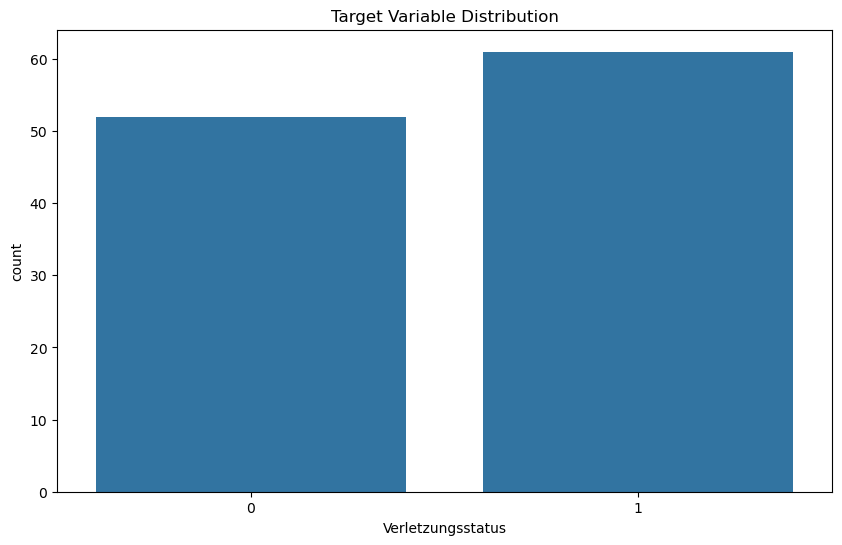

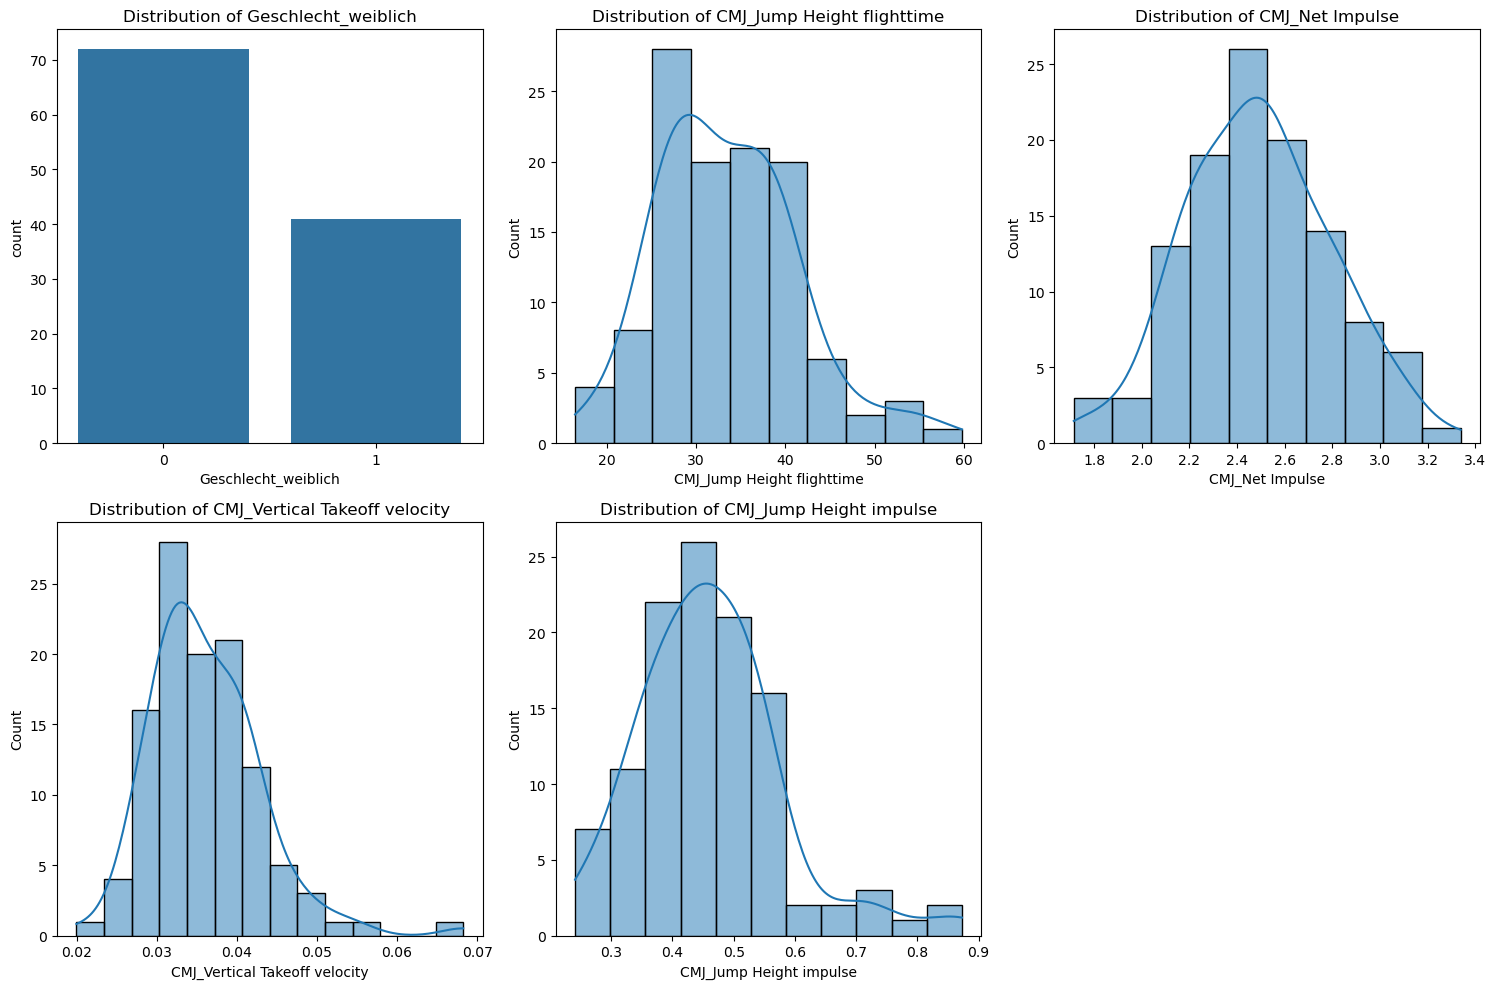


Defining models with parallel processing...


Overall Progress:   0%|          | 0/700 [00:00<?, ?it/s]


Validating model: Logistic Regression


Overall Progress:   7%|▋         | 50/700 [00:22<04:56,  2.19it/s]


Validating model: Decision Tree


Overall Progress:  14%|█▍        | 100/700 [00:33<03:07,  3.20it/s]


Validating model: Random Forest


Overall Progress:  21%|██▏       | 150/700 [00:46<02:38,  3.46it/s]


Validating model: Gradient Boosting


Overall Progress:  29%|██▊       | 200/700 [01:09<03:00,  2.77it/s]


Validating model: XGBoost


Overall Progress:  36%|███▌      | 250/700 [01:23<02:29,  3.02it/s]


Validating model: LightGBM


Overall Progress:  43%|████▎     | 300/700 [02:02<03:13,  2.07it/s]


Validating model: SVC


Overall Progress:  50%|█████     | 350/700 [02:15<02:21,  2.47it/s]


Validating model: k-Nearest Neighbors


Overall Progress:  57%|█████▋    | 400/700 [02:32<01:56,  2.58it/s]


Validating model: MLP Classifier


Overall Progress:  64%|██████▍   | 450/700 [02:47<01:30,  2.77it/s]


Validating model: Gaussian Naive Bayes


Overall Progress:  71%|███████▏  | 500/700 [02:58<01:03,  3.15it/s]


Validating model: Linear Discriminant Analysis


Overall Progress:  79%|███████▊  | 550/700 [03:09<00:43,  3.48it/s]


Validating model: Quadratic Discriminant Analysis


Overall Progress:  86%|████████▌ | 600/700 [03:20<00:26,  3.75it/s]


Validating model: Bagging Classifier


Overall Progress:  93%|█████████▎| 650/700 [03:33<00:13,  3.81it/s]


Validating model: Extra Trees


Overall Progress: 100%|██████████| 700/700 [03:45<00:00,  3.10it/s]


Model Performance Summary:
                              Model   Train Accuracy    Test Accuracy         F1-Score           Recall          ROC-AUC
0               Logistic Regression  0.9998 ± 0.0005  0.8871 ± 0.0594  0.8904 ± 0.0653  0.8787 ± 0.1136  0.9547 ± 0.0468
8                    MLP Classifier  1.0000 ± 0.0000  0.8902 ± 0.0669  0.8955 ± 0.0677  0.8867 ± 0.1021  0.9525 ± 0.0408
5                          LightGBM  1.0000 ± 0.0000  0.8629 ± 0.0624  0.8721 ± 0.0601  0.8723 ± 0.0948  0.9485 ± 0.0347
13                      Extra Trees  1.0000 ± 0.0000  0.8453 ± 0.0630  0.8590 ± 0.0581  0.8773 ± 0.0851  0.9471 ± 0.0396
3                 Gradient Boosting  1.0000 ± 0.0000  0.8609 ± 0.0680  0.8718 ± 0.0643  0.8821 ± 0.0978  0.9471 ± 0.0362
6                               SVC  0.9994 ± 0.0009  0.8778 ± 0.0657  0.8875 ± 0.0617  0.8950 ± 0.0869  0.9449 ± 0.0365
4                           XGBoost  1.0000 ± 0.0000  0.8528 ± 0.0613  0.8629 ± 0.0595  0.8638 ± 0.0943  0.9432 ± 0.0346
10  

In [4]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
import time
import warnings
from joblib import Parallel, delayed
from functools import partial

pd.set_option("display.width", 200)
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output


#############################################
# HELPER FUNCTIONS FOR VISUALIZATION
#############################################

def plot_distribution_comparison(X_original, X_augmented, cols_to_plot=None, n_cols=3, figsize=(18, 15)):
    """
    Plot distribution comparison between original and augmented data.

    Parameters:
    -----------
    X_original : DataFrame
        Original feature dataframe
    X_augmented : DataFrame
        Augmented feature dataframe
    cols_to_plot : list, optional
        List of columns to plot. If None, all columns will be plotted.
    n_cols : int, optional
        Number of columns in the subplot grid
    figsize : tuple, optional
        Figure size
    """
    if cols_to_plot is None:
        cols_to_plot = X_original.columns

    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, col in enumerate(cols_to_plot):
        ax = axes[i]
        if col == "Geschlecht_weiblich":
            # For categorical features like gender, use countplot
            counts_orig = X_original[col].value_counts().reset_index()
            counts_orig.columns = [col, 'count']
            counts_orig['Source'] = 'Original'

            counts_aug = X_augmented[col].value_counts().reset_index()
            counts_aug.columns = [col, 'count']
            counts_aug['Source'] = 'Augmented'

            counts = pd.concat([counts_orig, counts_aug], ignore_index=True)

            sns.barplot(x=col, y='count', hue='Source', data=counts, ax=ax)
            ax.set_xlabel('Gender (Female=1)')
        else:
            # For continuous features, use KDE plots
            if X_original[col].nunique() > 1:  # Nur plotten, wenn mehr als 1 Wert vorhanden
                sns.kdeplot(X_original[col], label='Original', ax=ax, color='blue', fill=True)
            if X_augmented[col].nunique() > 1:  # Nur plotten, wenn mehr als 1 Wert vorhanden
                sns.kdeplot(X_augmented[col], label='Augmented', ax=ax, color='red', fill=True)

        ax.set_title(f'Distribution of {col}')
        ax.legend()

    # Hide empty subplots
    for i in range(len(cols_to_plot), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    return fig


#############################################
# AUGMENTATIONSMETHODEN
#############################################

### 1. Cluster-basierte Augmentation (ohne zusätzliches Rauschen)
def perform_clustering(X_sub, max_clusters=4):
    # Wähle alle numerischen Spalten außer den Gruppierungsvariablen
    cols = [col for col in X_sub.columns if col not in ["Verletzungsstatus", "Geschlecht_weiblich"]]
    X_num = X_sub[cols]
    # Berechne die (absoluten) Korrelationen und transformiere in Distanzen
    corr = X_num.corr().abs()
    dist = np.clip(1 - corr, a_min=0, a_max=None)
    dists = squareform(dist.values)
    Z = linkage(dists, method='ward')
    cluster_labels = fcluster(Z, max_clusters, criterion='maxclust')
    clusters = {}
    for col, label in zip(cols, cluster_labels):
        clusters.setdefault(label, []).append(col)
    return clusters

def augment_subgroup(X_sub, clusters, p_augment=0.7):
    # Für jede Cluster-Gruppe: berechne Mittelwert und Kovarianzmatrix
    augmented_rows = []
    cluster_params = {}
    for cl_id, cols in clusters.items():
        cluster_data = X_sub[cols]
        mu = cluster_data.mean().values
        if len(cols) == 1:
            cov = np.cov(cluster_data.values.flatten(), ddof=0)
            cov = np.atleast_2d(cov)
        else:
            cov = np.cov(cluster_data.values, rowvar=False)
        cluster_params[cl_id] = (mu, cov, cols)
    # Für jede Zeile werden für jede Cluster-Gruppe (stochastisch) neue Werte gezogen
    for idx, row in X_sub.iterrows():
        new_row = row.copy()
        for cl_id, (mu, cov, cols) in cluster_params.items():
            if np.random.rand() < p_augment:
                new_values = np.random.multivariate_normal(mu, cov)
                for col, val in zip(cols, new_values):
                    new_row[col] = val
        augmented_rows.append(new_row)
    augmented_df = pd.DataFrame(augmented_rows)
    for col in ["Geschlecht_weiblich", "Verletzungsstatus"]:
        if col in augmented_df.columns:
            augmented_df[col] = augmented_df[col].astype(int)
    return augmented_df

# Parallel processing for augmenting one group
def process_group_cluster(group_df, num_new_samples, max_clusters, p_augment):
    group_df = group_df.reset_index(drop=True)
    clusters = perform_clustering(group_df, max_clusters=max_clusters)
    aug_list = []
    for _ in range(num_new_samples):
        aug = augment_subgroup(group_df, clusters, p_augment=p_augment)
        aug_list.append(aug)
    aug_group = pd.concat(aug_list, axis=0)
    return aug_group

def augment_training_data_cluster(X_train, y_train, num_new_samples=1, max_clusters=4, p_augment=0.7, n_jobs=-1):
    """
    Augmentiert die Trainingsdaten nach dem Cluster-Ansatz mit paralleler Verarbeitung.
    num_new_samples gibt an, wie viele augmentierte Samples pro Originalzeile generiert werden.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    
    # Prepare groups for parallel processing
    groups = []
    for key, group_df in df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        groups.append(group_df)
    
    # Process groups in parallel
    augmented_groups = Parallel(n_jobs=n_jobs)(
        delayed(process_group_cluster)(
            group_df, num_new_samples, max_clusters, p_augment
        ) for group_df in groups
    )
        
    augmented_df = pd.concat(augmented_groups, axis=0).reset_index(drop=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    return X_aug, y_aug


### 2. Cluster-basierte Augmentation mit Rauschen
def add_noise_to_data(df, noise_factor=0.1):
    df_noisy = df.copy()
    numeric_cols = [col for col in df_noisy.select_dtypes(include=['float64', 'int64']).columns 
                    if col not in ["Geschlecht_weiblich", "Verletzungsstatus"]]
    for col in numeric_cols:
        std = df_noisy[col].std()
        noise = np.random.normal(0, std * noise_factor, size=df_noisy.shape[0])
        df_noisy[col] += noise
    return df_noisy

def add_noise_to_group(df_group, noise_factor=0.1):
    # Hier wird einfach die oben definierte Funktion genutzt
    return add_noise_to_data(df_group, noise_factor=noise_factor)

# Parallel processing for cluster with noise
def process_group_cluster_noise(group_df, num_new_samples, max_clusters, p_augment, noise_factor):
    group_df = group_df.reset_index(drop=True)
    clusters = perform_clustering(group_df, max_clusters=max_clusters)
    aug_list = []
    for _ in range(num_new_samples):
        aug = augment_subgroup(group_df, clusters, p_augment=p_augment)
        aug_list.append(aug)
    aug_group = pd.concat(aug_list, axis=0).reset_index(drop=True)
    
    # Wende Rauschen an: teile die augmentierten Daten in zwei Hälften
    n = len(aug_group)
    half = n // 2
    global_noise = add_noise_to_data(aug_group.copy(), noise_factor=noise_factor)
    group_noise = add_noise_to_group(aug_group.copy(), noise_factor=noise_factor)
    # Nehme jeweils die erste Hälfte (bei ungerader Anzahl wird der Rest ignoriert)
    aug_noisy = pd.concat([global_noise.iloc[:half], group_noise.iloc[:half]], axis=0)
    return aug_noisy

def augment_training_data_cluster_noise(X_train, y_train, num_new_samples=1, max_clusters=4, p_augment=0.7, noise_factor=0.1, n_jobs=-1):
    """
    Wie augment_training_data_cluster, jedoch wird auf den erzeugten augmentierten Samples
    zusätzlich Rauschen angehängt – zur Hälfte global und zur Hälfte gruppenspezifisch.
    Parallele Verarbeitung mit n_jobs.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    
    # Prepare groups for parallel processing
    groups = []
    for key, group_df in df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"]):
        groups.append(group_df)
    
    # Process groups in parallel
    augmented_groups = Parallel(n_jobs=n_jobs)(
        delayed(process_group_cluster_noise)(
            group_df, num_new_samples, max_clusters, p_augment, noise_factor
        ) for group_df in groups
    )
        
    augmented_df = pd.concat(augmented_groups, axis=0).reset_index(drop=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    return X_aug, y_aug


### 3. Augmentation über Mittelwert-Bildung (Gruppenmittelwerte)

# Function to process a single group with mean-based augmentation
def process_group_means(group_df, group_new_samples):
    group_df = group_df.reset_index(drop=True)
    new_group_samples = []
    for _ in range(group_new_samples):
        sample_indices = np.random.choice(len(group_df), 2, replace=False)
        sample1 = group_df.iloc[sample_indices[0]]
        sample2 = group_df.iloc[sample_indices[1]]
        mean_sample = sample1.copy()
        numeric_cols = [col for col in group_df.columns if col != "Geschlecht_weiblich"]
        for col in numeric_cols:
            mean_sample[col] = (sample1[col] + sample2[col]) / 2
        new_group_samples.append(mean_sample)
    if new_group_samples:
        return pd.DataFrame(new_group_samples)
    return None

def augment_data_by_group_means(X_train, y_train, augmentation_factor=2, n_jobs=-1):
    """
    Augmentiert Daten basierend auf Gruppenmittelwerten mit paralleler Verarbeitung.
    Die Augmentation erfolgt innerhalb der Gruppen, die durch 'Verletzungsstatus'
    und 'Geschlecht_weiblich' definiert sind.
    """
    df_train = X_train.copy()
    df_train["Verletzungsstatus"] = y_train
    groups = df_train.groupby(["Verletzungsstatus", "Geschlecht_weiblich"])
    total_original_samples = len(df_train)
    total_new_samples = int(total_original_samples * (augmentation_factor - 1))
    group_sizes = groups.size()
    group_proportions = group_sizes / total_original_samples
    
    # Prepare tasks for parallel processing
    tasks = []
    for (injury_status, is_female), group_df in groups:
        group_new_samples = int(total_new_samples * group_proportions[(injury_status, is_female)])
        tasks.append((group_df, group_new_samples))
    
    # Process groups in parallel
    augmented_groups = Parallel(n_jobs=n_jobs)(
        delayed(process_group_means)(group_df, group_new_samples) 
        for group_df, group_new_samples in tasks
    )
    
    # Filter out None results
    augmented_groups = [group for group in augmented_groups if group is not None]
    
    augmented_df = pd.concat([df_train] + augmented_groups, ignore_index=True)
    y_aug = augmented_df["Verletzungsstatus"]
    X_aug = augmented_df.drop(columns=["Verletzungsstatus"])
    return X_aug, y_aug


def augment_training_data_combined(X_train, y_train, target_size=1000, visualize=False, max_plots=10, verbose=True, n_jobs=-1):
    """
    Augment training data with parallel processing
    """
    start_time = time.time()
    
    N = len(X_train)
    additional_needed = max(target_size - N, 0)
    per_method_needed = additional_needed // 3

    num_new_samples = max(per_method_needed // N, 1)
    augmentation_factor = 1 + (per_method_needed / N)

    # Remove the print statements if verbose is False
    if verbose:
        print(f"Starting combined augmentation to reach target size: {target_size}")
        print(f"Original dataset size: {N}")
        print(f"Samples needed per method: {per_method_needed}")
    
    # Parallel execution of all three augmentation methods
    results = Parallel(n_jobs=min(3, n_jobs))(
        delayed(func)(X_train, y_train, **params) for func, params in [
            (augment_training_data_cluster, {"num_new_samples": num_new_samples, "n_jobs": n_jobs}),
            (augment_training_data_cluster_noise, {"num_new_samples": num_new_samples, "n_jobs": n_jobs}),
            (augment_data_by_group_means, {"augmentation_factor": augmentation_factor, "n_jobs": n_jobs})
        ]
    )
    
    X_aug_cluster, y_aug_cluster = results[0]
    X_aug_cluster_noise, y_aug_cluster_noise = results[1] 
    X_aug_group_means, y_aug_group_means = results[2]
    
    def subsample(X_aug, y_aug, required):
        if len(X_aug) > required:
            idx = np.random.choice(len(X_aug), required, replace=False)
            return X_aug.iloc[idx].reset_index(drop=True), y_aug.iloc[idx].reset_index(drop=True)
        else:
            return X_aug, y_aug

    X_aug_cluster, y_aug_cluster = subsample(X_aug_cluster, y_aug_cluster, per_method_needed)
    X_aug_cluster_noise, y_aug_cluster_noise = subsample(X_aug_cluster_noise, y_aug_cluster_noise, per_method_needed)
    X_aug_group_means, y_aug_group_means = subsample(X_aug_group_means, y_aug_group_means, per_method_needed)

    X_aug_combined = pd.concat([X_aug_cluster, X_aug_cluster_noise, X_aug_group_means], axis=0).reset_index(drop=True)
    y_aug_combined = pd.concat([y_aug_cluster, y_aug_cluster_noise, y_aug_group_means], axis=0).reset_index(drop=True)

    X_total = pd.concat([X_train.reset_index(drop=True), X_aug_combined], axis=0).reset_index(drop=True)
    y_total = pd.concat([y_train.reset_index(drop=True), y_aug_combined], axis=0).reset_index(drop=True)

    if len(X_total) > target_size:
        idx = np.random.choice(len(X_total), target_size, replace=False)
        X_total = X_total.iloc[idx].reset_index(drop=True)
        y_total = y_total.iloc[idx].reset_index(drop=True)

    elapsed_time = time.time() - start_time
    
    # Remove these print statements if verbose is False
    if verbose:
        print(f"Augmentation completed. Final dataset size: {len(X_total)}")
        print(f"Augmentation took {elapsed_time:.2f} seconds")
    
    if visualize:
        if verbose:
            print("Visualizing distributions of original vs augmented data...")
        cols_to_plot = list(X_train.columns)[:max_plots]
        plot_distribution_comparison(X_train, X_aug_combined, cols_to_plot)
        plt.suptitle('Feature Distributions: Original vs Augmented Data', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=y_train)
        plt.title('Original Target Distribution')
        plt.xlabel('Verletzungsstatus')
        
        plt.subplot(1, 2, 2)
        sns.countplot(x=y_total)
        plt.title('Augmented Target Distribution')
        plt.xlabel('Verletzungsstatus')
        
        plt.tight_layout()
        plt.show()

    return X_total, y_total


#############################################
# MODELLVERGLEICH (REPEATED STRATIFIED CV)
#############################################

# Function to process a single fold
def process_fold(fold_idx, train_index, test_index, X, y, model, use_augmentation, target_size, visualize_first_fold):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)
    
    feature_cols = [f"F{i}" for i in range(X_train_df.shape[1])]
    
    gender_col_name = None
    gender_col_idx = None
    
    try:
        if isinstance(X, pd.DataFrame) and "Geschlecht_weiblich" in X.columns:
            gender_col_idx = list(X.columns).index("Geschlecht_weiblich")
            feature_cols[gender_col_idx] = "Geschlecht_weiblich"
            gender_col_name = "Geschlecht_weiblich"
    except:
        pass

    X_train_df.columns = feature_cols
    X_test_df.columns = feature_cols

    cols_to_scale = feature_cols
    if gender_col_name:
        cols_to_scale = [col for col in feature_cols if col != gender_col_name]
        
    scaler = StandardScaler()
    X_train_df[cols_to_scale] = scaler.fit_transform(X_train_df[cols_to_scale])
    X_test_df[cols_to_scale] = scaler.transform(X_test_df[cols_to_scale])

    if use_augmentation:
        visualize_this_fold = visualize_first_fold and fold_idx == 0
        X_train_aug, y_train_aug = augment_training_data_combined(
            X_train_df, pd.Series(y_train), 
            target_size=target_size,
            visualize=visualize_this_fold,
            verbose=False,
            n_jobs=-1  # Use parallel processing here too
        )
    else:
        X_train_aug, y_train_aug = X_train_df, pd.Series(y_train)

    model.fit(X_train_aug, y_train_aug)
    y_train_pred = model.predict(X_train_aug)
    y_test_pred = model.predict(X_test_df)

    accuracy_train = accuracy_score(y_train_aug, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_val = f1_score(y_test, y_test_pred)
    recall_val = recall_score(y_test, y_test_pred)
    
    try:
        roc_auc_val = roc_auc_score(y_test, model.predict_proba(X_test_df)[:, 1])
    except:
        roc_auc_val = np.nan

    return accuracy_train, accuracy_test, f1_val, recall_val, roc_auc_val


def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10, use_augmentation=False, target_size=1000, visualize_first_fold=False, progress_bar=None, n_jobs=-1):
    """
    Perform repeated k-fold cross-validation with parallel processing
    """
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)
    
    # Create a list of fold parameters
    fold_params = []
    for fold_idx, (train_index, test_index) in enumerate(rkf.split(X, y)):
        fold_params.append((fold_idx, train_index, test_index))
    
    # Process folds in parallel
    results = Parallel(n_jobs=n_jobs)(
        delayed(process_fold)(
            fold_idx, train_index, test_index, X, y, model, 
            use_augmentation, target_size, visualize_first_fold
        ) for fold_idx, train_index, test_index in fold_params
    )
    
    # Extract metrics from results
    accuracy_train = [r[0] for r in results]
    accuracy_test = [r[1] for r in results]
    f1 = [r[2] for r in results]
    recall = [r[3] for r in results]
    roc_auc = [r[4] for r in results]
    
    # Update the global progress bar if provided
    if progress_bar is not None:
        progress_bar.update(len(fold_params))

    return {
        "Train Accuracy": (np.mean(accuracy_train), np.std(accuracy_train)),
        "Test Accuracy": (np.mean(accuracy_test), np.std(accuracy_test)),
        "F1-Score": (np.mean(f1), np.std(f1)),
        "Recall": (np.mean(recall), np.std(recall)),
        "ROC-AUC": (np.nanmean(roc_auc), np.nanstd(roc_auc)),
    }


#############################################
# HAUPT-EXECUTION: MODELLE VERGLEICHEN
#############################################
if __name__ == '__main__':
    # ---------------------------------------------
    # 1. Datensatz laden
    # ---------------------------------------------
    file_path = r"K:\Team\Böhmer_Michael\TSA\ML\Basistabelle\Basistabelle_ML_neu.xlsx"
    
    try:
        print(f"Loading dataset from {file_path}...")
        df = pd.read_excel(file_path)
        print(f"Dataset loaded. Shape: {df.shape}")

        # ---------------------------------------------
        # 2. Zielvariable und Feature-Matrix erstellen
        # ---------------------------------------------
        y = df['Verletzungsstatus']
        
        # Prüfen, ob "Geschlecht_weiblich" existiert
        if 'Geschlecht_weiblich' in df.columns:
            print("Gender column 'Geschlecht_weiblich' found in dataset.")
            X_df = df.drop(columns=['Verletzungsstatus'])  # Alles außer Zielvariable
        else:
            print("No gender column found in dataset.")
            X_df = df.drop(columns=['Verletzungsstatus'])  # Alles außer Zielvariable

        print("\nData Overview:")
        print(f"Total samples: {len(df)}")
        print(f"Features: {X_df.shape[1]}")
        print(f"Target distribution:\n{y.value_counts()}")

        # ---------------------------------------------
        # 3. Erste Visualisierung der Daten
        # ---------------------------------------------
        print("\nVisualizing original data distributions...")
        plt.figure(figsize=(10, 6))
        sns.countplot(x=y)
        plt.title('Target Variable Distribution')
        plt.show()

        # Beispielhafte Feature-Visualisierung
        num_features_to_show = min(5, X_df.shape[1])
        cols_to_plot = X_df.columns[:num_features_to_show]
        
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(cols_to_plot):
            plt.subplot(2, 3, i + 1)
            if X_df[col].nunique() < 10:  # Für kategorische Spalten
                sns.countplot(x=X_df[col])
            else:
                sns.histplot(X_df[col], kde=True)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

        # ---------------------------------------------
        # 4. Modelle definieren mit n_jobs=-1 für parallele Verarbeitung
        # ---------------------------------------------
        print("\nDefining models with parallel processing...")
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
            "Gradient Boosting": GradientBoostingClassifier(random_state=42),
            "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, n_jobs=-1),
            "LightGBM": LGBMClassifier(verbose=-1, random_state=42, n_jobs=-1),
            "SVC": SVC(probability=True, random_state=42),
            "k-Nearest Neighbors": KNeighborsClassifier(n_jobs=-1),
            "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
            "Gaussian Naive Bayes": GaussianNB(),
            "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
            "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
            "Bagging Classifier": BaggingClassifier(random_state=42, n_jobs=-1),
            "Extra Trees": ExtraTreesClassifier(random_state=42, n_jobs=-1),
        }

        # ---------------------------------------------
        # 5. Augmentationseinstellungen
        # ---------------------------------------------
        use_augmentation = True
        target_size = 1000
        visualize_first_fold = True
        
        # ---------------------------------------------
        # 6. Cross-Validation & Modellvergleich
        # ---------------------------------------------
        results = []
        
        # Definiere die Werte für n_splits und n_repeats
        n_splits = 5
        n_repeats = 10
        
        # Berechne die Gesamtzahl der Iterationen für den Fortschrittsbalken
        total_iterations = len(models) * n_splits * n_repeats
        
        # Globaler Fortschrittsbalken
        with tqdm(total=total_iterations, desc="Overall Progress") as global_progress:
            for model_name, model in models.items():
                # Nur das Modell ausgeben
                print(f"\nValidating model: {model_name}")

                # Übergebe den Fortschrittsbalken an die Funktion
                metrics = repeated_k_fold(
                    model, X_df, y,
                    n_splits=n_splits,  # explizit übergeben
                    n_repeats=n_repeats,  # explizit übergeben
                    use_augmentation=use_augmentation,
                    target_size=target_size,
                    visualize_first_fold=(visualize_first_fold and model_name == list(models.keys())[0]),
                    progress_bar=global_progress  # Fortschrittsbalken übergeben
                )

                # Ergebnisse formatieren
                formatted_metrics = {
                    "Model": model_name,
                    "Train Accuracy": f"{metrics['Train Accuracy'][0]:.4f} ± {metrics['Train Accuracy'][1]:.4f}",
                    "Test Accuracy": f"{metrics['Test Accuracy'][0]:.4f} ± {metrics['Test Accuracy'][1]:.4f}",
                    "F1-Score": f"{metrics['F1-Score'][0]:.4f} ± {metrics['F1-Score'][1]:.4f}",
                    "Recall": f"{metrics['Recall'][0]:.4f} ± {metrics['Recall'][1]:.4f}",
                    "ROC-AUC": f"{metrics['ROC-AUC'][0]:.4f} ± {metrics['ROC-AUC'][1]:.4f}",
                }

                results.append(formatted_metrics)

        # ---------------------------------------------
        # 7. Ergebnisübersicht
        # ---------------------------------------------
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
        print("\nModel Performance Summary:")
        print(results_df)

    except FileNotFoundError:
        print("Die Datei wurde nicht gefunden. Bitte überprüfe den Pfad.")
    except Exception as e:
        print(f"Ein Fehler ist aufgetreten: {e}")

       

In [6]:
!git add Test_ML.ipynb

In [2]:
!git remote set-url origin https://github.com/michi1308/ml_motum.git



In [24]:
!git commit -m ""

[master 8fc34a5] Clusterbildung validieren und Frankenstein Augmentation
 1 file changed, 231 insertions(+), 79 deletions(-)


In [22]:
!git remote -v

origin	https://github.com/michi1308/ml_motum.git (fetch)
origin	https://github.com/michi1308/ml_motum.git (push)


In [26]:
!git push origin master

To https://github.com/michi1308/ml_motum.git
   be0ca68..8fc34a5  master -> master
